# Author Names + Affiliations Consolidation Summary

Let's compute some stats for display

In [1]:
import pandas as pd
# from unidecode import unidecode
import re
from datetime import date
import json
import numpy as np
import string
import time
from matplotlib import pyplot
import matplotlib as plt
# from fuzzywuzzy import fuzz 
# from fuzzywuzzy import process 
# set column options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
from functools import reduce
import pprint
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('tableau-colorblind10' )


In [2]:
base_path="/Users/sijiawu/Work/Thesis/Data/Affiliations/"

In [3]:
content_ex=['MISC',  'Discussion', 'Review', 'Review2',"Errata"]
content=['Article', 'Comment', 'Reply', 'Rejoinder']
jid=["aer","ecta","jpe","qje","res"]

In [4]:
with open(base_path+"author_proc_all_w_red.json") as f: 
    data = f.read() 
proc_auths_all = json.loads(data) 

proc_auths=pd.read_pickle(base_path+"auth_proc_w_aff_flat.pkl")
j_data=pd.read_pickle(base_path.split('Aff')[0]+"Combined/022_merged_proc_scopus_inception_with_auth_split_2020_content_type_corrected.pkl")

In [5]:
proc_auths["consolidated"]=proc_auths["resolution"]
proc_auths["aff_count"]=proc_auths["affs"].apply(len)
proc_auths["aff_weight"]=1/proc_auths["aff_count"]
proc_auths['decade'] = (proc_auths['year'] // 10) * 10


In [6]:
proc_auths.dtypes

auth_ord         object
raw              object
init             object
suffix           object
a1               object
a2               object
a3               object
last             object
affs             object
year             object
content_type     object
jid              object
url              object
a1_order         object
a2_order         object
a3_order         object
init_order       object
fl               object
a1_tk_count       int64
ini              object
inil             object
r_a1              int64
r_a1_name        object
p_a1             object
p_a1_name        object
resolution       object
consolidated     object
aff_count         int64
aff_weight      float64
decade           object
dtype: object

In [7]:
proc_auths["content_type"].value_counts()

content_type
Article      43431
Comment       1807
Reply         1064
Rejoinder      134
Name: count, dtype: int64

In [8]:
tbl=[["Description","Total", "\\% of Raw", "Reduced by"],
 ]
tbl.append(["Author names allowing for duplication", "{0:,}".format(proc_auths["raw"].shape[0]),"-","-"])
tbl.append(["Unique names raw format", "{0:,}".format(proc_auths["raw"].unique().shape[0]),"-","-"])
tbl.append(["Unique names initial processing", "{0:,}".format(proc_auths["init"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["init"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["init"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique alias 1 names (a1)", "{0:,}".format(proc_auths["a1"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["a1"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["a1"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique alias 2 names (a2)", "{0:,}".format(proc_auths["a2"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["a2"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]), "{0:,}".format(-proc_auths["a2"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique alias 3 names (a3)", "{0:,}".format(proc_auths["a3"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["a3"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["a3"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique last names", "{0:,}".format(proc_auths["last"].unique().shape[0]),"-","-"])
tbl.append(["Unique names after consolidation", "{0:,}".format(proc_auths["consolidated"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["consolidated"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["consolidated"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])

In [9]:
proc_auths["url"].unique().shape

(29393,)

In [10]:
temp_str="\\toprule\n"

temp_str+= "\\makecell[l]{{\\textbf{{{}}}}} & \\textbf{{{}}} & \\textbf{{{}}} & \\textbf{{{}}} \\\\ \n".format(tbl[0][0], tbl[0][1], tbl[0][2], tbl[0][3])
temp_str+="\\midrule\n"
for i in range(1,len(tbl)):
    row = "\\makecell[l]{{{}}} & {} & {} & {}\\\\\n".format(tbl[i][0], tbl[i][1], tbl[i][2], tbl[i][3])
    temp_str+=row
temp_str+="\\bottomrule"

print(temp_str)

\toprule
\makecell[l]{\textbf{Description}} & \textbf{Total} & \textbf{\% of Raw} & \textbf{Reduced by} \\ 
\midrule
\makecell[l]{Author names allowing for duplication} & 46,436 & - & -\\
\makecell[l]{Unique names raw format} & 18,861 & - & -\\
\makecell[l]{Unique names initial processing} & 17,471 & 92.630\% & 1,390\\
\makecell[l]{Unique alias 1 names (a1)} & 17,304 & 91.745\% & 1,557\\
\makecell[l]{Unique alias 2 names (a2)} & 16,189 & 85.833\% & 2,672\\
\makecell[l]{Unique alias 3 names (a3)} & 14,388 & 76.284\% & 4,473\\
\makecell[l]{Unique last names} & 10,734 & - & -\\
\makecell[l]{Unique names after consolidation} & 15,613 & 82.779\% & 3,248\\
\bottomrule


In [11]:
df = proc_auths[(proc_auths['year'] >= 1940) & (proc_auths['year'] <= 2019)].copy()
df['decade'] = (df['year'] // 10) * 10

# Step 2: Group by decade and compute unique counts per column
grouped = df.groupby('decade').agg({
    'raw': pd.Series.nunique,
    'init': pd.Series.nunique,
    'a1': pd.Series.nunique,
    'a2': pd.Series.nunique,
    # 'a3': pd.Series.nunique,
    'consolidated': pd.Series.nunique
}).reset_index()

# Optional: rename columns for clarity
grouped.columns = ['decade', 'unique_raw', 'unique_init', 'unique_a1',
                    'unique_a2', 
                    # 'unique_a3', 
                    'unique_consolidated']
grouped["reduction_raw"]=grouped["unique_raw"]/grouped["unique_raw"]
grouped["reduction_init"]=grouped["unique_init"]/grouped["unique_raw"]
grouped["reduction_a1"]=grouped["unique_a1"]/grouped["unique_raw"]
grouped["reduction_a2"]=grouped["unique_a2"]/grouped["unique_raw"]
# grouped["reduction_a3"]=grouped["unique_a3"]/grouped["unique_raw"]
grouped["reduction_consolidated"]=grouped["unique_consolidated"]/grouped["unique_raw"]

In [12]:
grouped

,decade,unique_raw,unique_init,unique_a1,unique_a2,unique_consolidated,reduction_raw,reduction_init,reduction_a1,reduction_a2,reduction_consolidated
0,1940,1254,1251,1238,1152,1133,1.0,0.997608,0.987241,0.918660,0.903509
1,1950,1420,1416,1409,1342,1314,1.0,0.997183,0.992254,0.945070,0.925352
2,1960,2074,2073,2058,1915,1851,1.0,0.999518,0.992285,0.923337,0.892478
3,1970,3432,3428,3404,3195,3060,1.0,0.998834,0.991841,0.930944,0.891608
4,1980,3540,3531,3520,3432,3293,1.0,0.997458,0.994350,0.969492,0.930226
5,1990,3405,3390,3385,3335,3213,1.0,0.995595,0.994126,0.979442,0.943612
6,2000,3854,3844,3836,3777,3666,1.0,0.997405,0.995330,0.980021,0.951220
7,2010,6124,5196,5169,5048,4973,1.0,0.848465,0.844056,0.824298,0.812051


In [13]:
temp_str="\\toprule\n"

temp_str+= "\\makecell[l]{{\\textbf{{Decade}}}} & \\textbf{{{Raw}}} & \\textbf{{{Initial Proc}}} & \\textbf{{{a1 Format}}} & \\textbf{{{Consolidated}}} \\\\ \n"
temp_str+="\\midrule\n"
for i in grouped.index:
    row = "\\makecell[l]{{{0}}} & {1:,} & {2:,} ({3:,.3f} \\%) & {4:,} ({5:,.3f} \\%) & {6:,} ({7:,.3f} \\%) \\\\\n".format(grouped.loc[i,"decade"], 
                                                                                 grouped.loc[i,"unique_raw"],
                                                                                 grouped.loc[i,"unique_init"],
                                                                                 grouped.loc[i,"reduction_init"]*100,
                                                                                 grouped.loc[i,"unique_a1"],
                                                                                 grouped.loc[i,"reduction_a1"]*100,
                                                                                 grouped.loc[i,"unique_consolidated"],
                                                                                 grouped.loc[i,"reduction_consolidated"]*100)
    temp_str+=row

temp_str+="\\bottomrule"

print(temp_str)

\toprule
\makecell[l]{{\textbf{{Decade}}}} & \textbf{{{Raw}}} & \textbf{{{Initial Proc}}} & \textbf{{{a1 Format}}} & \textbf{{{Consolidated}}} \\ 
\midrule
\makecell[l]{1940} & 1,254 & 1,251 (99.761 \%) & 1,238 (98.724 \%) & 1,133 (90.351 \%) \\
\makecell[l]{1950} & 1,420 & 1,416 (99.718 \%) & 1,409 (99.225 \%) & 1,314 (92.535 \%) \\
\makecell[l]{1960} & 2,074 & 2,073 (99.952 \%) & 2,058 (99.229 \%) & 1,851 (89.248 \%) \\
\makecell[l]{1970} & 3,432 & 3,428 (99.883 \%) & 3,404 (99.184 \%) & 3,060 (89.161 \%) \\
\makecell[l]{1980} & 3,540 & 3,531 (99.746 \%) & 3,520 (99.435 \%) & 3,293 (93.023 \%) \\
\makecell[l]{1990} & 3,405 & 3,390 (99.559 \%) & 3,385 (99.413 \%) & 3,213 (94.361 \%) \\
\makecell[l]{2000} & 3,854 & 3,844 (99.741 \%) & 3,836 (99.533 \%) & 3,666 (95.122 \%) \\
\makecell[l]{2010} & 6,124 & 5,196 (84.847 \%) & 5,169 (84.406 \%) & 4,973 (81.205 \%) \\
\bottomrule


In [14]:

plt.style.use('tableau-colorblind10' )

def plot_unique_with_reduction_annotations(df_grouped, span, increase_font):
    """
    Plots a grouped bar chart for unique_* columns with annotations showing
    both count and percentage reduction in a single rotated line.
    
    Parameters:
        df_grouped (pd.DataFrame): DataFrame with 'decade', 'unique_*', and 'reduction_*' columns
        colors (list): Optional list of bar colors
    """
    # Identify columns
    unique_cols = [col for col in df_grouped.columns if col.startswith("unique_")]
    reduction_cols = ["reduction_" + col.split("unique_")[1] for col in unique_cols]

    x = np.arange(len(df_grouped))  # decade positions
    num_bars = len(unique_cols)
    width = 0.8 / num_bars
    
    # Extract decade labels
    decade_labels = df_grouped['decade'].astype(str)

    fig, ax = plt.subplots(figsize=(12, 8))

    # Set y-limit to leave space for annotations
    max_height = df_grouped[unique_cols].to_numpy().max()
    ax.set_ylim(0, max_height * 1.25)

    for i, (unique_col, reduction_col) in enumerate(zip(unique_cols, reduction_cols)):
        offset = (i - num_bars / 2) * width + width / 2
        heights = df_grouped[unique_col]
        reductions = df_grouped[reduction_col] * 100

        bar_label = unique_col.replace("unique_", "")[0:6]
        bars = ax.bar(x + offset, heights, width, label=unique_col.replace("unique_", "")[0:6])

        # Annotate at group max height (per-decade)
        for j, bar in enumerate(bars):
            group_max = df_grouped.loc[j, unique_cols].max()
            value_label = f'{int(heights.iloc[j])} ({reductions.iloc[j]:.1f}%)'

            # Main annotation at group max height
            ax.annotate(value_label,
                        xy=(bar.get_x() + bar.get_width() / 2, group_max+25),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        rotation=90, fontsize=11+increase_font)

            # Secondary annotation at y=1000 (label of bar)
            ax.annotate(bar_label,
                        xy=(bar.get_x() + bar.get_width() / 2, 150),
                        textcoords="data",
                        ha='center', va='bottom',
                        rotation=90, color='white', fontsize=11+increase_font, fontweight='bold')
            
    # X-axis and chart styling
    ax.set_xticks(x)
    ax.set_xticklabels(decade_labels, fontsize=11+increase_font)
    ax.tick_params(axis='y', labelsize=11+increase_font)
    ax.set_xlabel(span)
    ax.set_ylabel('Number of Unique Names')
    ax.legend(title="Field", fontsize=11+increase_font, title_fontsize=13+increase_font)


    plt.tight_layout()
    plt.show()


In [15]:
grouped.columns

Index(['decade', 'unique_raw', 'unique_init', 'unique_a1', 'unique_a2',
       'unique_consolidated', 'reduction_raw', 'reduction_init',
       'reduction_a1', 'reduction_a2', 'reduction_consolidated'],
      dtype='object')

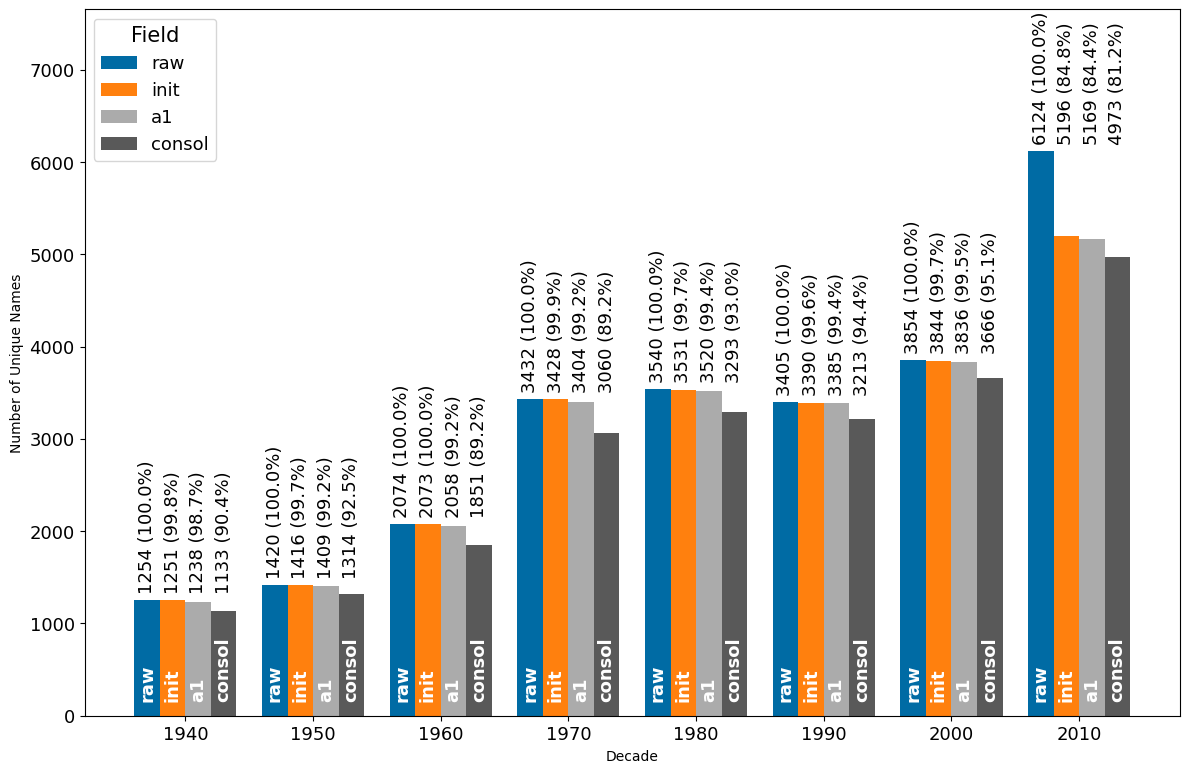

In [16]:
plot_unique_with_reduction_annotations(grouped[['decade', 'unique_raw', 'unique_init', 'unique_a1',
       'unique_consolidated', 'reduction_raw', 'reduction_init', 'reduction_a1', 'reduction_consolidated']], "Decade", 2)


In [17]:
df = proc_auths[(proc_auths['year'] >= 1940) & (proc_auths['year'] <= 2019)].copy()
df['decade'] = (df['year'] // 20) * 20

grouped = df.groupby('decade').agg({
    'raw': pd.Series.nunique,
    'init': pd.Series.nunique,
    'a1': pd.Series.nunique,
    'a2': pd.Series.nunique,
    # 'a3': pd.Series.nunique,
    'consolidated': pd.Series.nunique
}).reset_index()

# Optional: rename columns for clarity
grouped.columns = ['decade', 'unique_raw', 'unique_init', 'unique_a1',
                    'unique_a2', 
                    # 'unique_a3', 
                    'unique_consolidated']
grouped["reduction_raw"]=grouped["unique_raw"]/grouped["unique_raw"]
grouped["reduction_init"]=grouped["unique_init"]/grouped["unique_raw"]
grouped["reduction_a1"]=grouped["unique_a1"]/grouped["unique_raw"]
grouped["reduction_a2"]=grouped["unique_a2"]/grouped["unique_raw"]
# grouped["reduction_a3"]=grouped["unique_a3"]/grouped["unique_raw"]

grouped["reduction_consolidated"]=grouped["unique_consolidated"]/grouped["unique_raw"]

In [18]:
grouped.columns

Index(['decade', 'unique_raw', 'unique_init', 'unique_a1', 'unique_a2',
       'unique_consolidated', 'reduction_raw', 'reduction_init',
       'reduction_a1', 'reduction_a2', 'reduction_consolidated'],
      dtype='object')

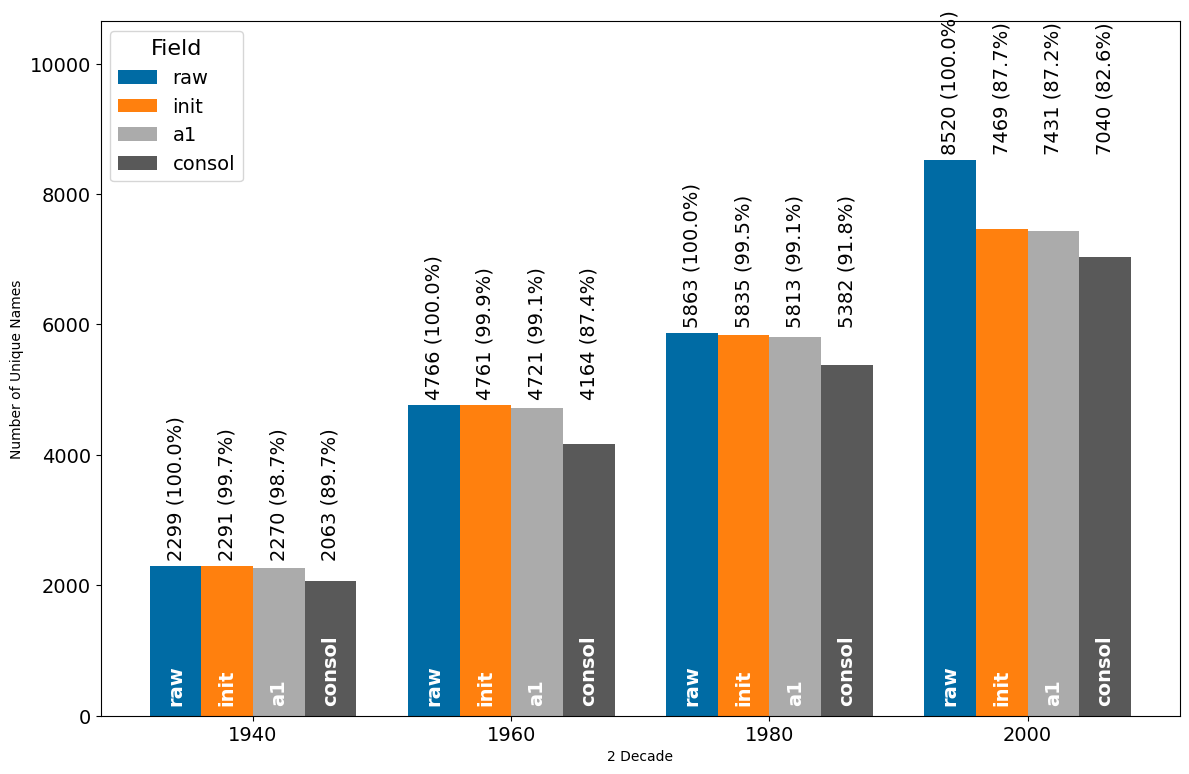

In [19]:
plot_unique_with_reduction_annotations(grouped[['decade', 'unique_raw', 'unique_init', 'unique_a1',
       'unique_consolidated', 'reduction_raw', 'reduction_init', 'reduction_a1', 'reduction_consolidated']], "2 Decade", 3)

In [20]:
proc_auths.columns

Index(['auth_ord', 'raw', 'init', 'suffix', 'a1', 'a2', 'a3', 'last', 'affs',
       'year', 'content_type', 'jid', 'url', 'a1_order', 'a2_order',
       'a3_order', 'init_order', 'fl', 'a1_tk_count', 'ini', 'inil', 'r_a1',
       'r_a1_name', 'p_a1', 'p_a1_name', 'resolution', 'consolidated',
       'aff_count', 'aff_weight', 'decade'],
      dtype='object')

In [21]:
grouped = proc_auths.groupby(['url', 'year']).size().reset_index(name='count')
grouped['bucket'] = grouped['count'].apply(lambda x: str(x) if x < 4 else '4+')
result = grouped.groupby(['year', 'bucket']).size().reset_index(name='nums')

In [22]:
proc_auths.content_type.value_counts()

content_type
Article      43431
Comment       1807
Reply         1064
Rejoinder      134
Name: count, dtype: int64

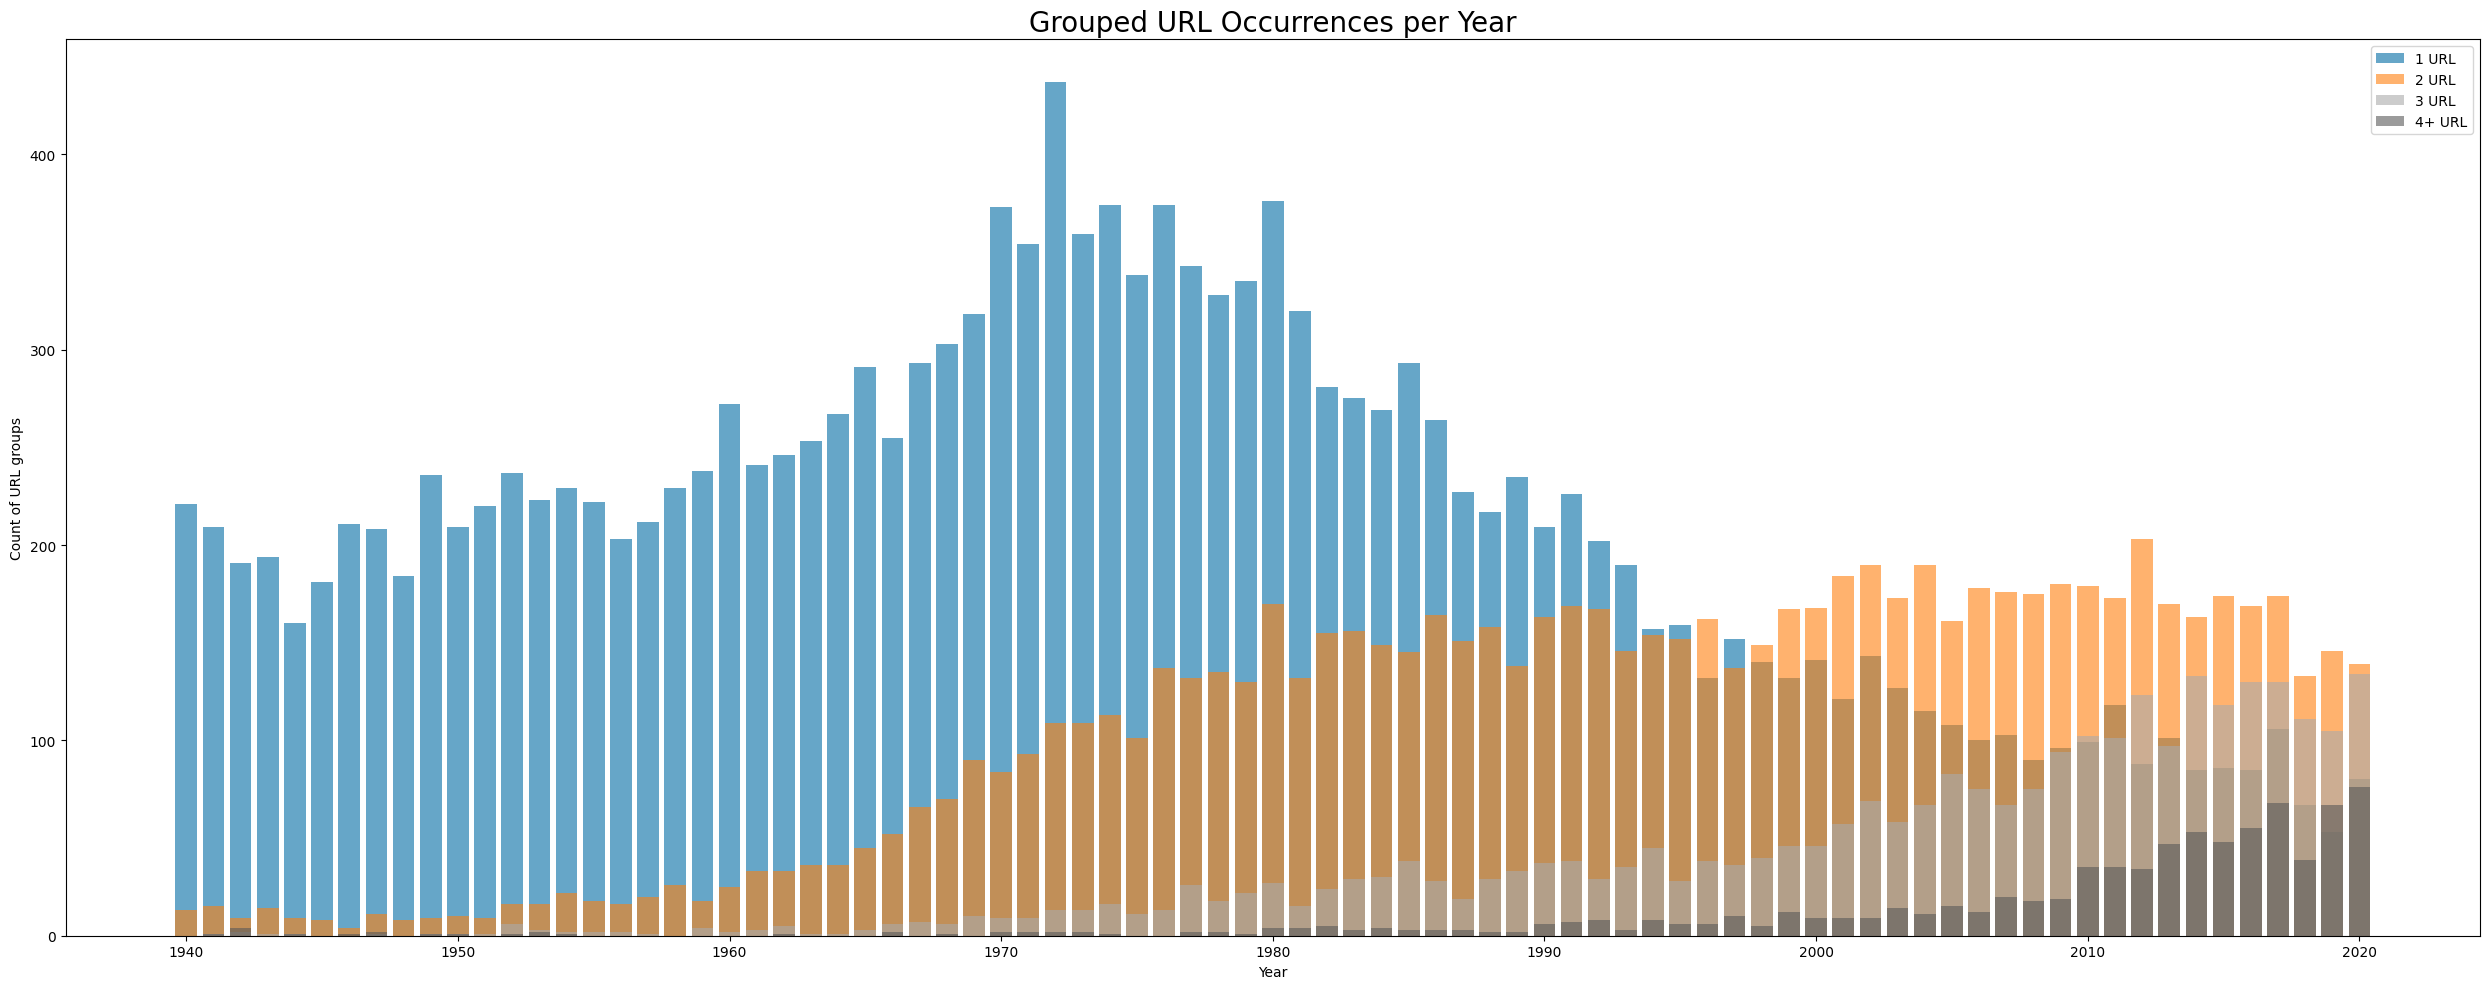

In [23]:
def grouped_chart_overlay(grouped, count_name, ylabel, title):
    # Step 3: Plot
    # Step 2: Create a pivot table for plotting
    plot_data = grouped.groupby(['year', 'bucket']).size().reset_index(name='nums')
    pivot = plot_data.pivot(index='year', columns='bucket', values='nums').fillna(0).sort_index()

    plt.rcParams["figure.figsize"] = (25, 10)
    buckets=grouped["bucket"].unique()
    buckets.sort()
    for bucket in buckets:
        if bucket in pivot.columns:
            plt.bar(pivot.index, pivot[bucket], label=f'{bucket} {count_name}', alpha=0.6)

    plt.title(title, size=20)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Step 1: Create the grouped + bucketed data
grouped = proc_auths.groupby(['url', 'year']).size().reset_index(name='count')
grouped['bucket'] = grouped['count'].apply(lambda x: str(x) if x < 4 else '4+')

grouped_chart_overlay(grouped, "URL",'Count of URL groups', 'Grouped URL Occurrences per Year')


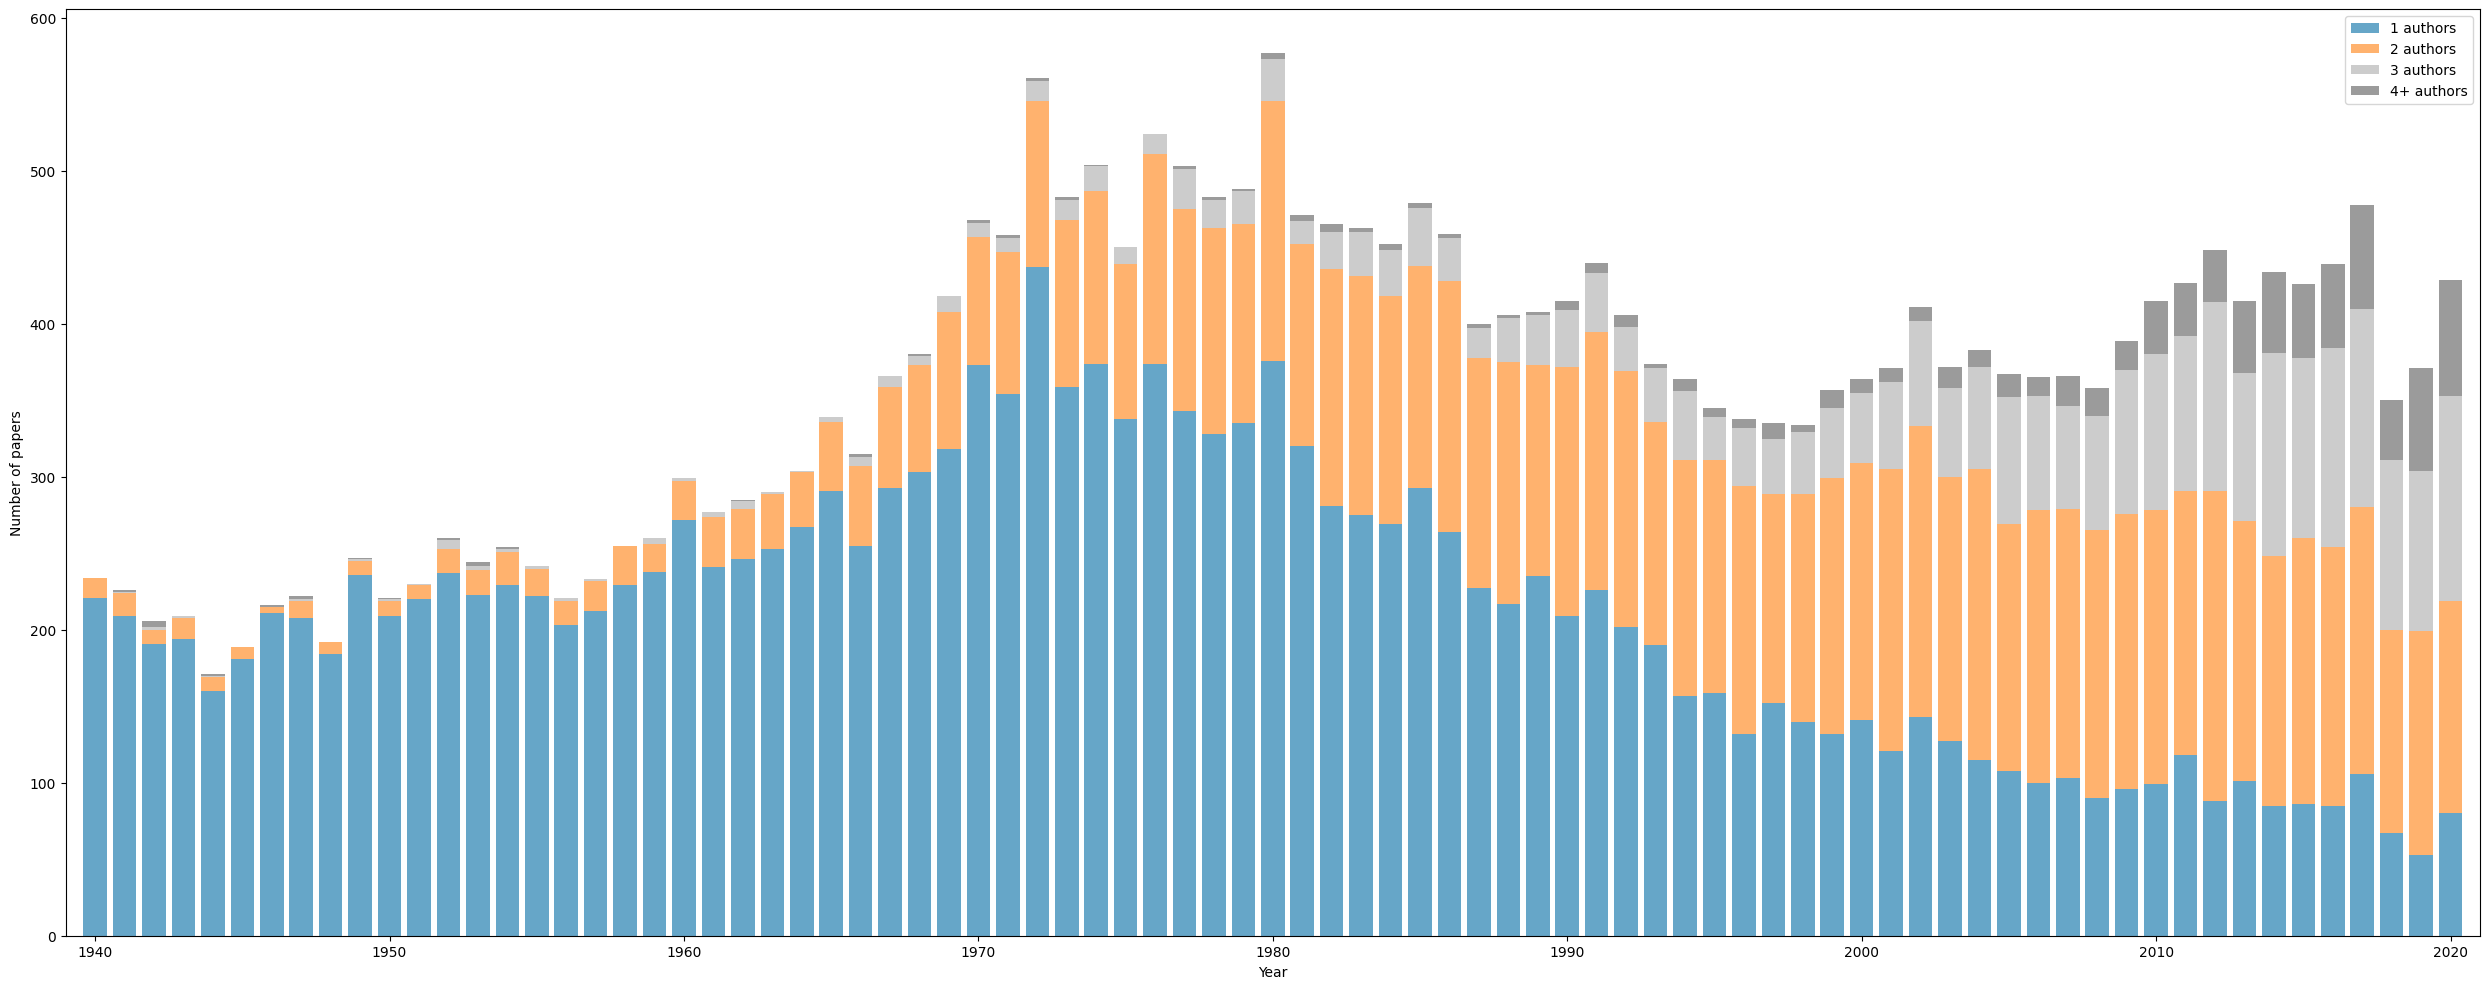

In [24]:
def grouped_chart_stacked(grouped, count_name, ylabel, title, size=True, count=None):
    # Step 2: Prepare pivoted data
    if size:
        plot_data = grouped.groupby(['year', 'bucket']).size().reset_index(name='nums')
        pivot = plot_data.pivot(index='year', columns='bucket', values='nums').fillna(0).sort_index()
    else:
        plot_data = grouped.groupby(['year', 'bucket'])[count].sum().reset_index(name="count")
        pivot = plot_data.pivot(index='year', columns='bucket', values=count).fillna(0).sort_index()


    # Step 3: Plot stacked bars
    plt.rcParams["figure.figsize"] = (25, 10)
    plt.xlim((1939,2021))
    bottom = None

    buckets=list(grouped["bucket"].unique())
    numeric = [s for s in buckets if s.isdigit()]
    non_numeric = [s for s in buckets if not s.isdigit()]
    buckets = sorted(numeric, key=int) + sorted(non_numeric)

    for bucket in buckets:
        if bucket in pivot.columns:
            if bottom is None:
                plt.bar(pivot.index, pivot[bucket], label=f'{bucket} {count_name}', alpha=0.6)
                bottom = pivot[bucket].copy()
            else:
                plt.bar(pivot.index, pivot[bucket], bottom=bottom, label=f'{bucket} {count_name}', alpha=0.6)
                bottom += pivot[bucket]

    # plt.title(title, size=20)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Step 1: Group and bucket
grouped = proc_auths.groupby(['url', 'year']).size().reset_index(name='count')
grouped['bucket'] = grouped['count'].apply(lambda x: str(x) if x < 4 else '4+')
grouped_chart_stacked(grouped, 'authors','Number of papers','Stacked Bar Chart of URL Group Frequencies by Year')


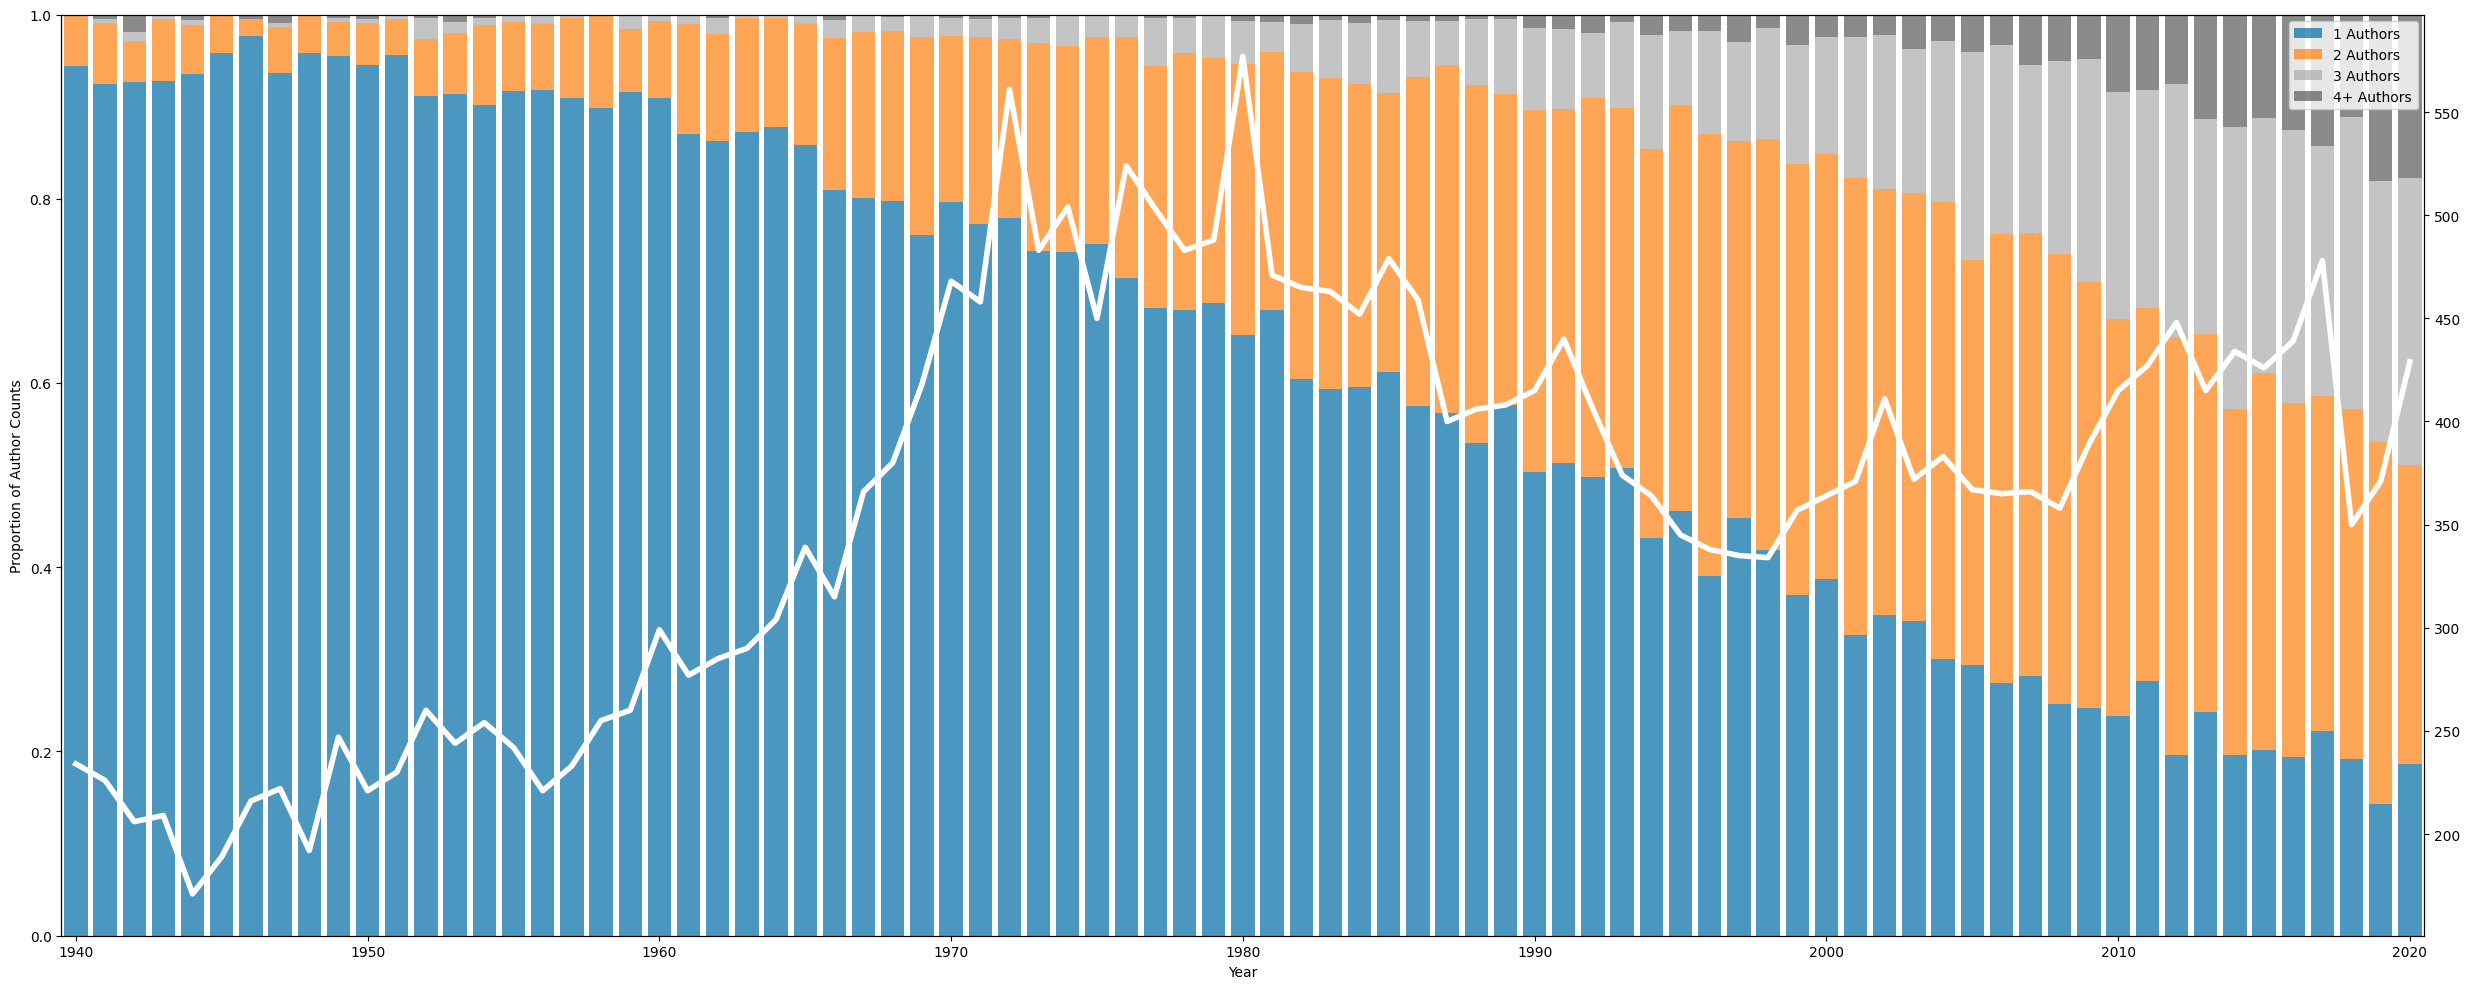

In [25]:
def grouped_chart_stacked_100(grouped, count_name, ylabel, title,showtot= False):
    # Step 2: Pivot to get counts per (year, bucket)
    plot_data = grouped.groupby(['year', 'bucket']).size().reset_index(name='nums')
    pivot = plot_data.pivot(index='year', columns='bucket', values='nums').fillna(0).sort_index()

    # Step 3: Normalize to get proportions
    proportions = pivot.div(pivot.sum(axis=1), axis=0)

    # Step 4: Get total counts for white line (right axis)
    total_counts = pivot.sum(axis=1)

    # Step 5: Plot
    fig, ax1 = plt.subplots(figsize=(25, 10))
    bottom = None

    buckets=grouped["bucket"].unique()
    buckets.sort()
    for bucket in buckets:
        if bucket in proportions.columns:
            values = proportions[bucket]
            proportions.index = proportions.index.astype(int)

            if bottom is None:
                ax1.bar(proportions.index, values, label=f'{bucket} {count_name}', alpha=0.7, align='center')
                bottom = values.copy()
            else:
                ax1.bar(proportions.index, values, bottom=bottom, label=f'{bucket} {count_name}', alpha=0.7, align='center')
                bottom += values

    ax1.set_ylabel(title)
    ax1.set_xlabel('Year')
    # ax1.set_title('100% Stacked Bar Chart of Author Count Frequencies by Year')
    ax1.set_ylim(0, 1)
    ax1.set_xlim(proportions.index.min() - 0.5, proportions.index.max() + 0.5)
    ax1.legend()

    if showtot:
    # Step 6: Add second y-axis for total URL counts
        ax2 = ax1.twinx()
        ax2.plot(total_counts.index, total_counts.values, color='white', linewidth=4, label=f'Total {count_name}')
        ax2.set_ylabel(ylabel, color='white')
        ax2.tick_params(axis='y')

    # Optional: Improve layout
    fig.tight_layout()
    plt.show()

# Step 1: Group and bucket
grouped = proc_auths.groupby(['url', 'year']).size().reset_index(name='count')
grouped['bucket'] = grouped['count'].apply(lambda x: str(x) if x < 4 else '4+')
grouped_chart_stacked_100(grouped, "Authors", 'Total Author count Proportion', 'Proportion of Author Counts', True)

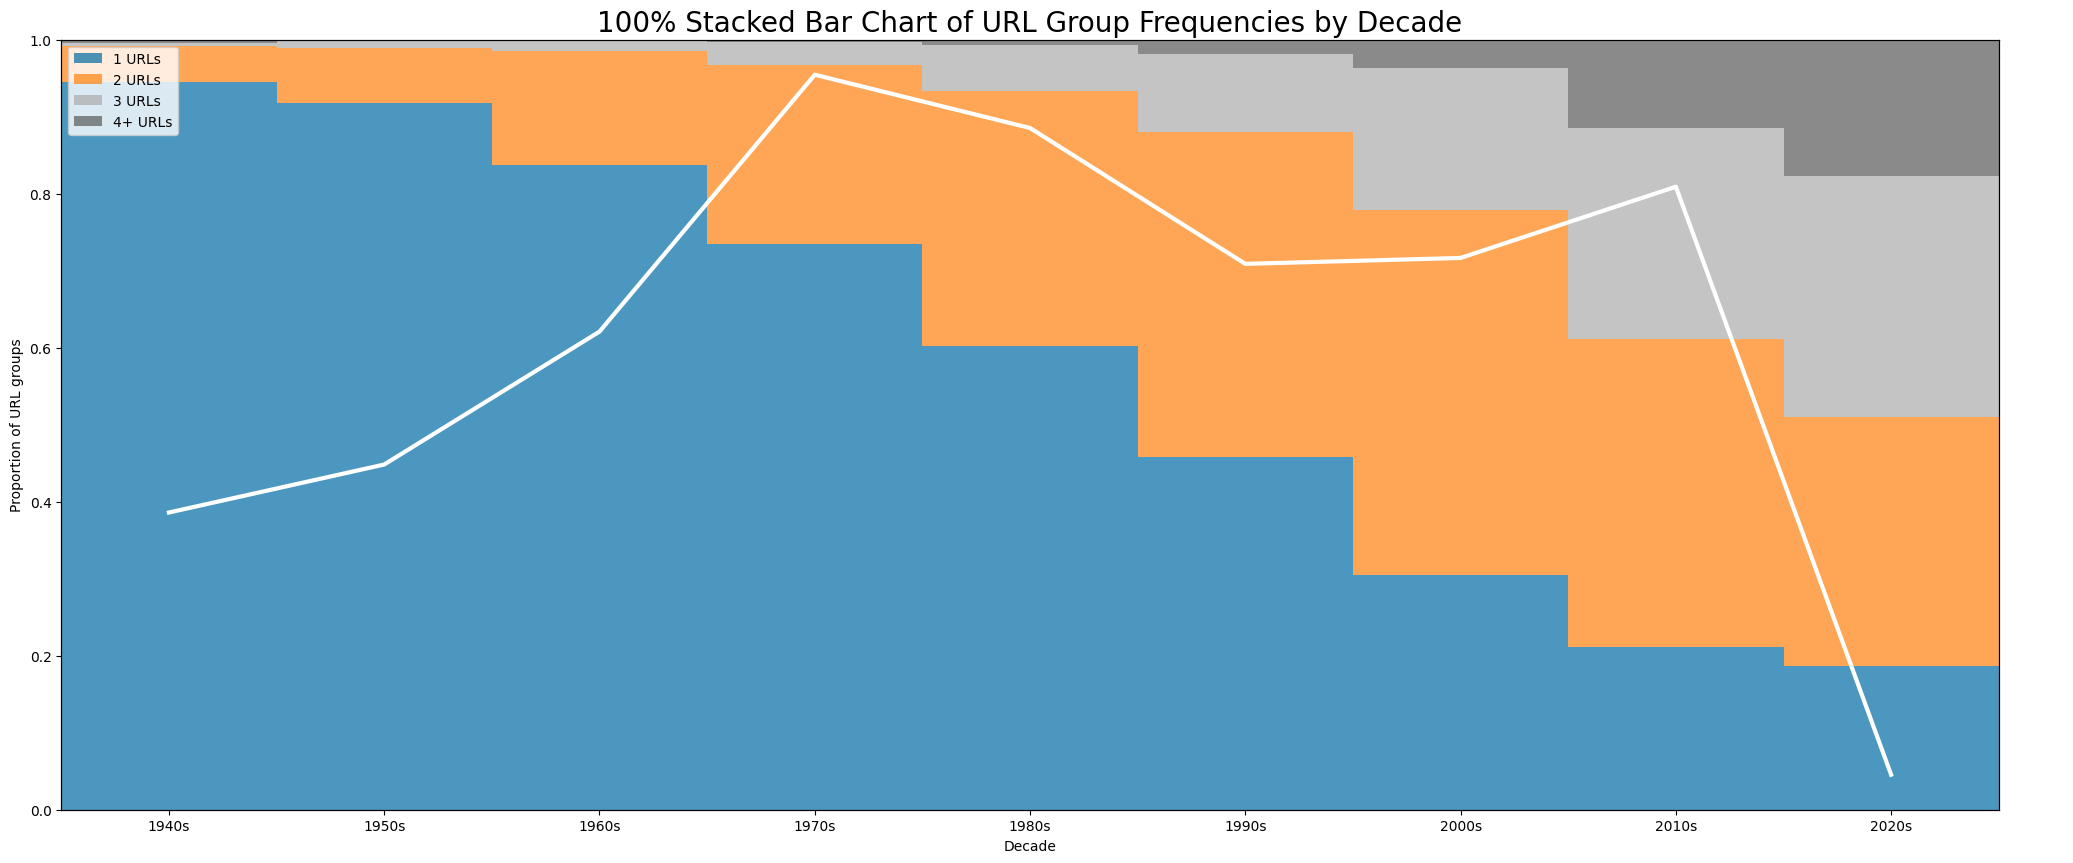

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group URL/year and count
grouped = proc_auths.groupby(['url', 'year']).size().reset_index(name='count')

# Step 2: Bucket counts (1, 2, 3, 4+)
grouped['bucket'] = grouped['count'].apply(lambda x: str(x) if x < 4 else '4+')

# Step 3: Add decade
grouped['decade'] = (grouped['year'] // 10) * 10

# Step 4: Group by decade and bucket
plot_data = grouped.groupby(['decade', 'bucket']).size().reset_index(name='nums')

# Step 5: Pivot to wide format
pivot = plot_data.pivot(index='decade', columns='bucket', values='nums').fillna(0).sort_index()

# Step 6: Normalize for 100% stacked bars
proportions = pivot.div(pivot.sum(axis=1), axis=0)

# Step 7: Totals for right axis line
total_counts = pivot.sum(axis=1)

# Step 8: Plotting
fig, ax1 = plt.subplots(figsize=(25, 10))
bottom = None

for bucket in ['1', '2', '3', '4+']:
    if bucket in proportions.columns:
        values = proportions[bucket]
        if bottom is None:
            ax1.bar(proportions.index, values, label=f'{bucket} URLs', alpha=0.7, width=10, align='center')
            bottom = values.copy()
        else:
            ax1.bar(proportions.index, values, bottom=bottom, label=f'{bucket} URLs', alpha=0.7, width=10, align='center')
            bottom += values

# Left axis (proportion)
ax1.set_ylabel('Proportion of URL groups')
ax1.set_xlabel('Decade')
ax1.set_ylim(0, 1)
ax1.set_xlim(proportions.index.min() - 5, proportions.index.max() + 5)

# Format x-axis to show "1950s", "1960s", ...
ax1.set_xticks(proportions.index)
ax1.set_xticklabels([f"{int(dec)}s" for dec in proportions.index])

# Right axis (white line)
ax2 = ax1.twinx()
ax2.plot(total_counts.index, total_counts.values, color='white', linewidth=3, label='Total URLs')
ax2.set_ylabel('Total URL groups', color='white')
ax2.tick_params(axis='y', colors='white')

# Titles, legend, layout
ax1.set_title('100% Stacked Bar Chart of URL Group Frequencies by Decade', size=20)
ax1.legend(loc='upper left')
plt.show()


In [27]:
proc_auths.columns

Index(['auth_ord', 'raw', 'init', 'suffix', 'a1', 'a2', 'a3', 'last', 'affs',
       'year', 'content_type', 'jid', 'url', 'a1_order', 'a2_order',
       'a3_order', 'init_order', 'fl', 'a1_tk_count', 'ini', 'inil', 'r_a1',
       'r_a1_name', 'p_a1', 'p_a1_name', 'resolution', 'consolidated',
       'aff_count', 'aff_weight', 'decade'],
      dtype='object')

In [30]:
sum(proc_auths["aff_count"])/proc_auths.shape[0]

1.1881514342320614

In [31]:
print(proc_auths["aff_count"].value_counts())
for i in range(1940, 2020, 10):
    temp=proc_auths[(proc_auths["year"]>=i)&(proc_auths["year"]<i+10)]
    avg=sum(temp["aff_count"])/temp.shape[0]
    print(f"{i} {avg}")

aff_count
1    38529
2     6460
3      936
0      298
4      163
5       38
6       10
7        2
Name: count, dtype: int64
1940 1.009090909090909
1950 1.0191729323308272
1960 1.0479026411185914
1970 1.089107365792759
1980 1.097940435620092
1990 1.1717123177959314
2000 1.2495230307985827
2010 1.3824762294243942


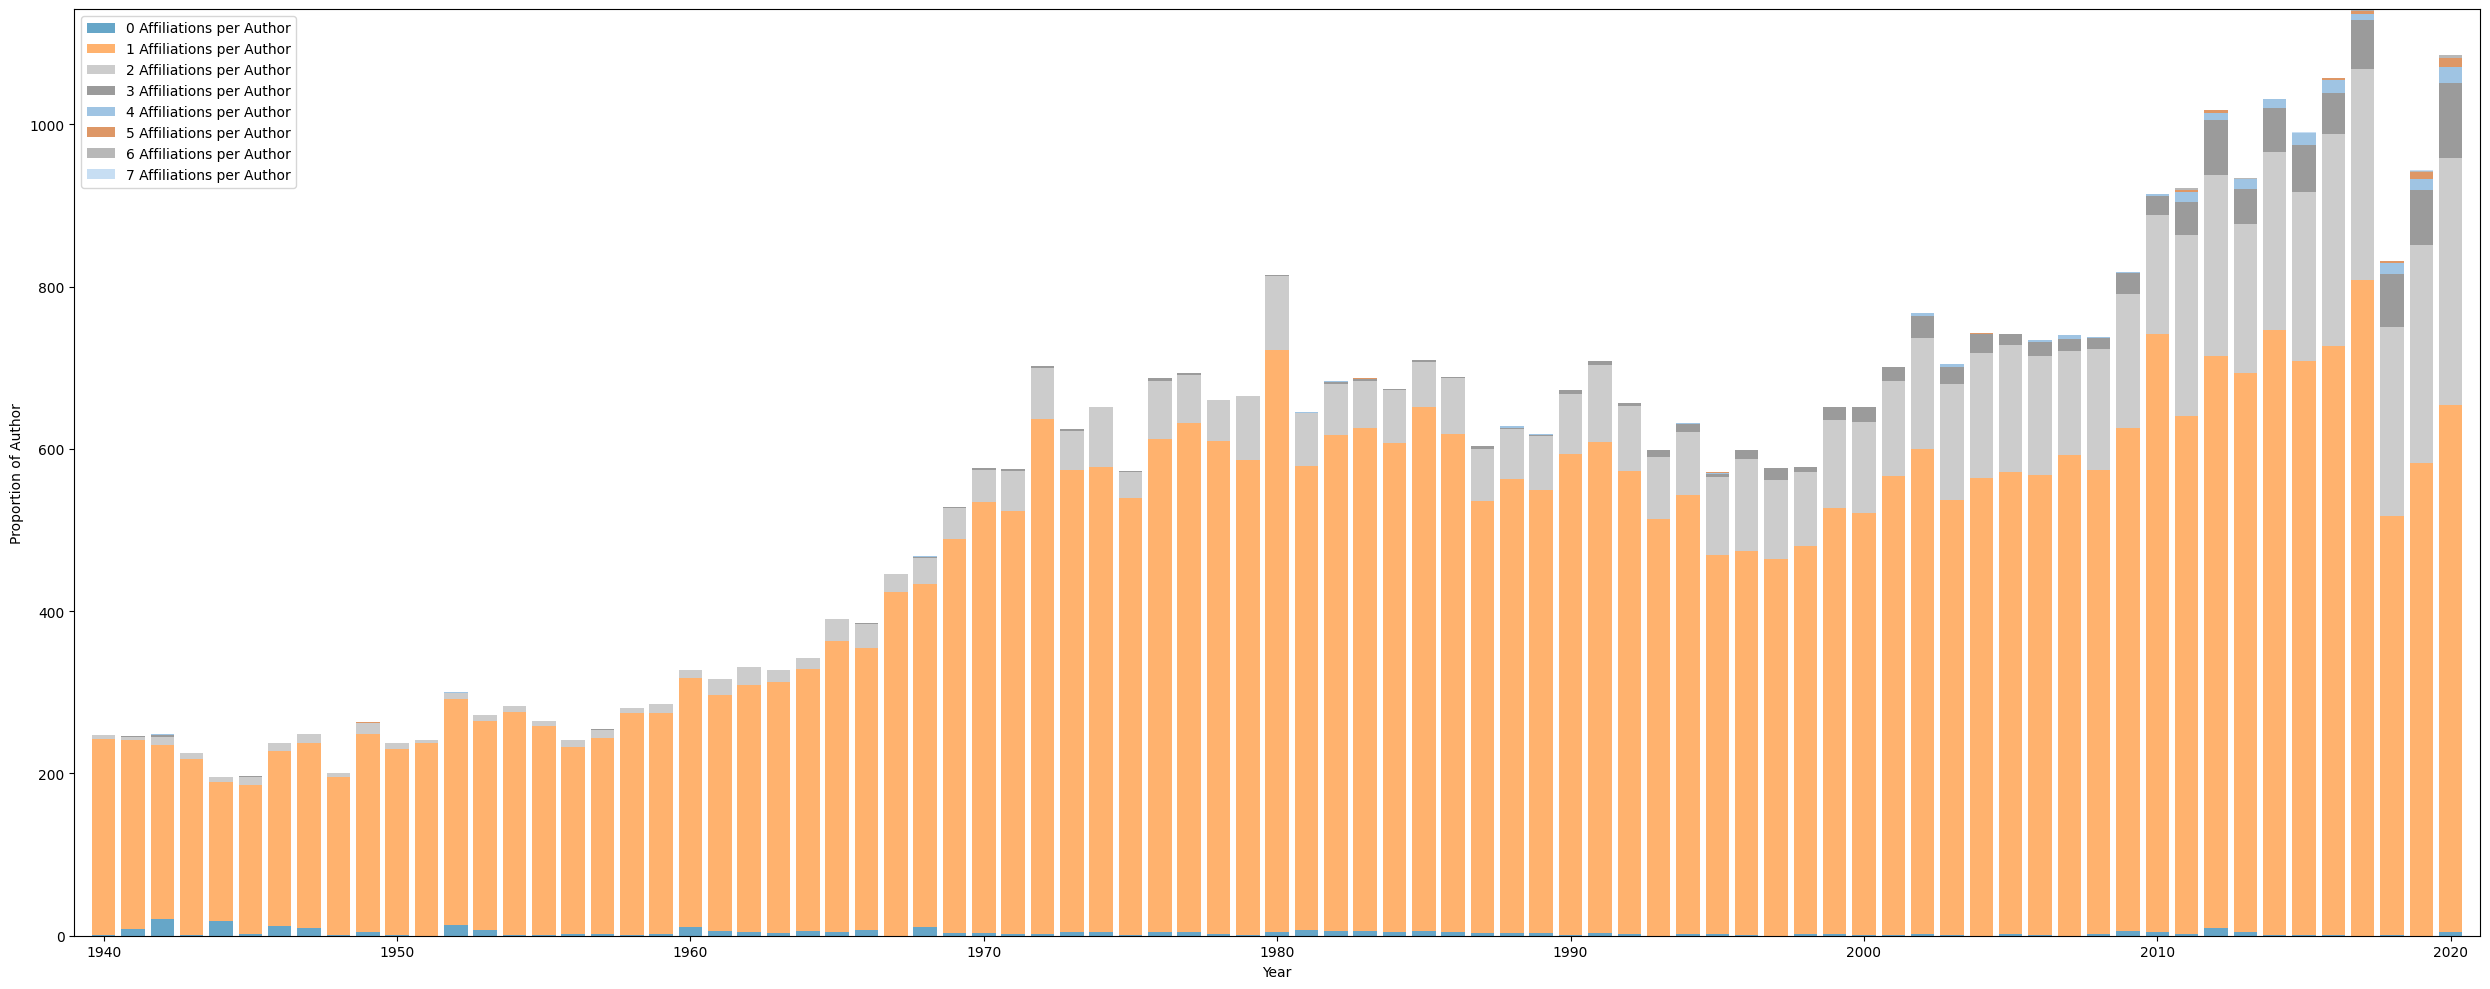

In [32]:
# Step 1: Group and bucket
grouped = proc_auths.groupby(['aff_count', 'year']).size().reset_index(name='count')
grouped['bucket'] = grouped['aff_count'].apply(lambda x: str(x))

grouped_chart_stacked(grouped, "Affiliations per Author", 'Proportion of Author',"Proporation of Authors per year that have 1 to 7 affiliations per publication",False, "count")



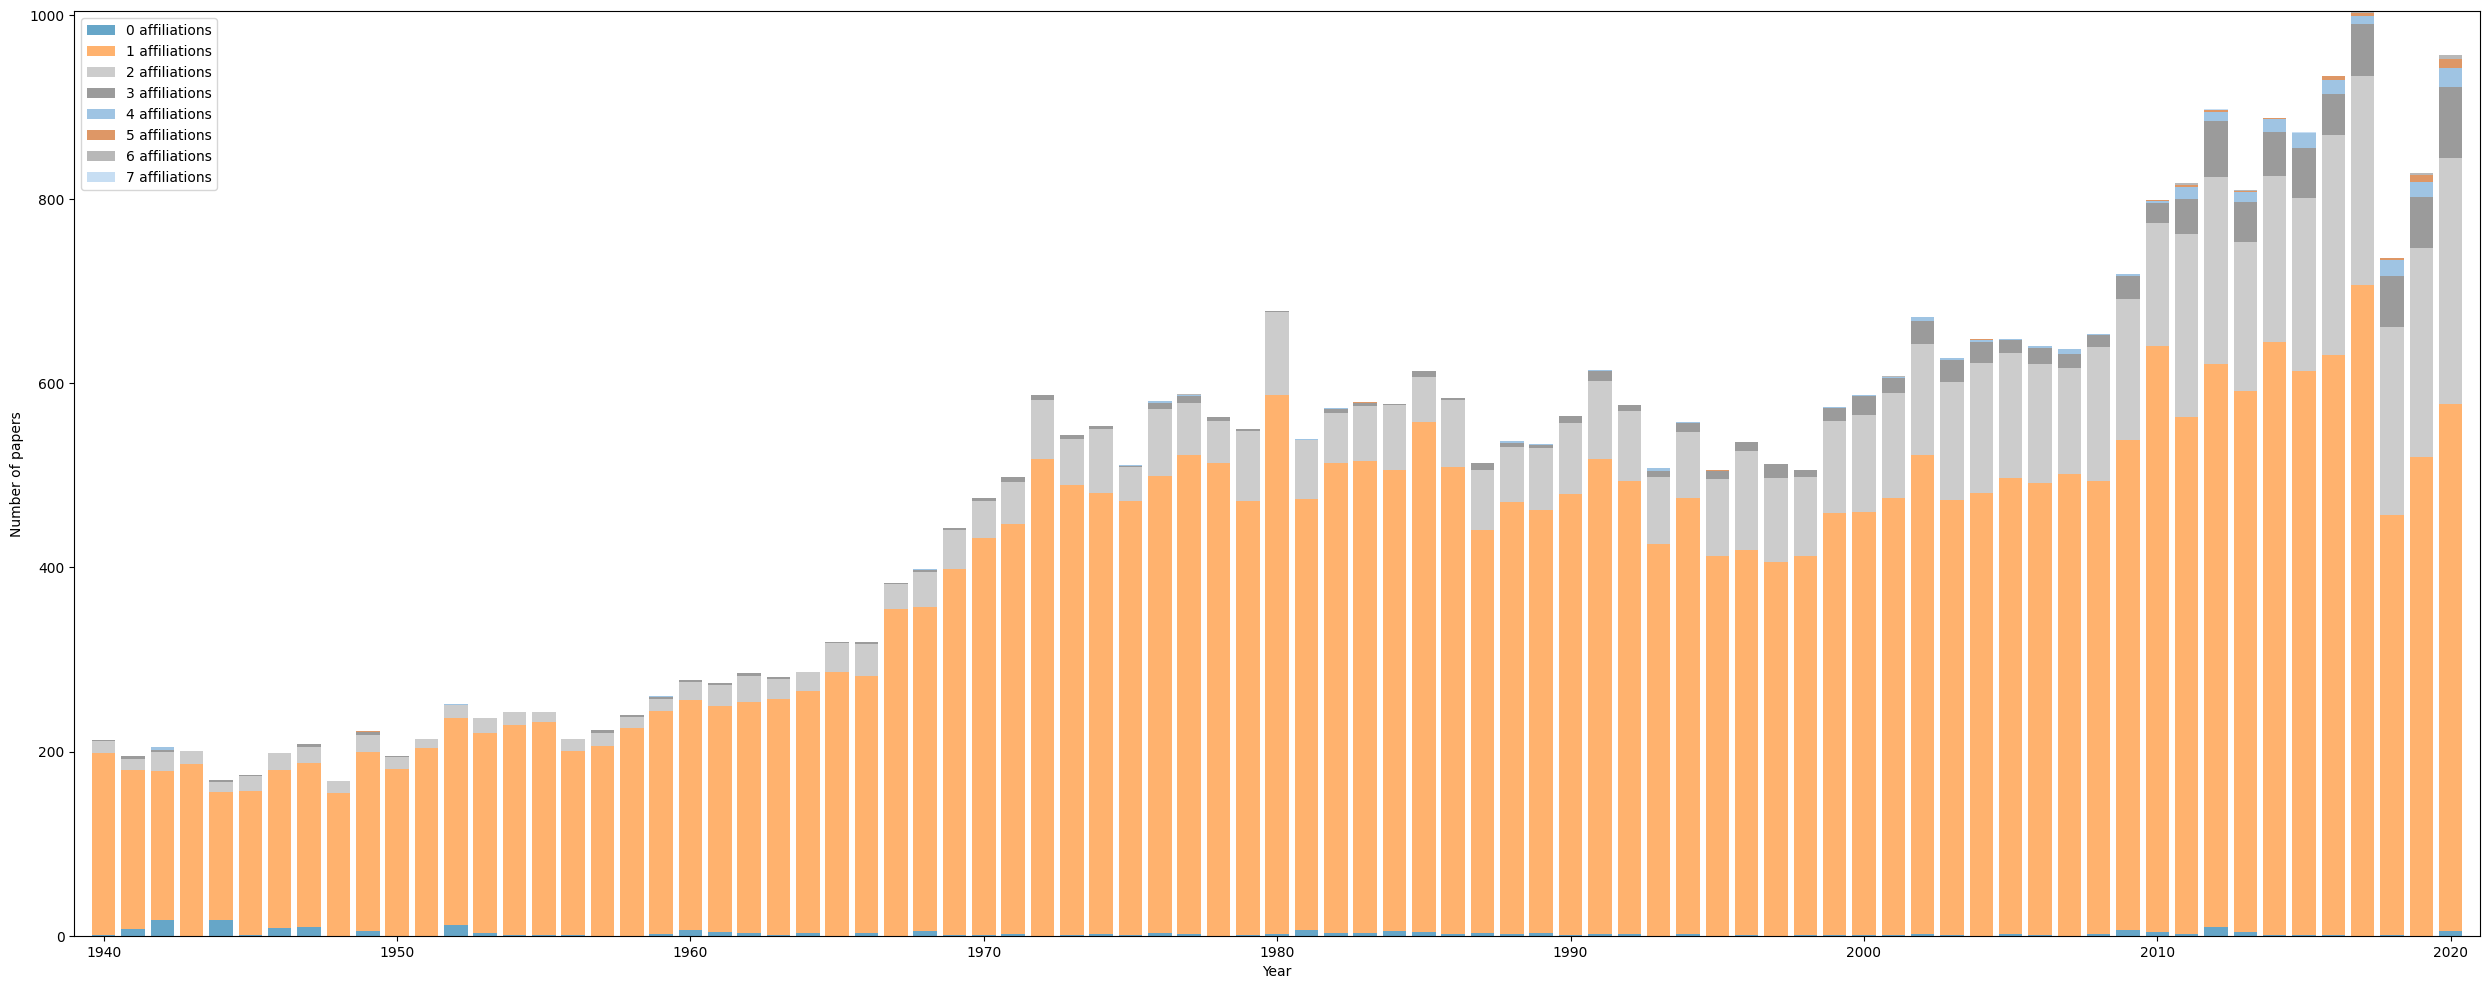

In [ ]:
# number of affiliations per consolidated author per year
consol=pd.DataFrame(proc_auths.groupby(['consolidated','year'])['affs'].apply(lambda x: set().union(*x))).reset_index()
consol["aff_count"]=consol["affs"].apply(len)
grouped= consol.groupby(["year","aff_count"]).size().reset_index(name="count")
grouped['bucket'] = grouped['aff_count'].apply(lambda x: str(x))

grouped_chart_stacked(grouped, "affiliations","Number of papers",'Stacked Bar Chart of affiliations per author (consolidated) per publication Year', False, 'count')

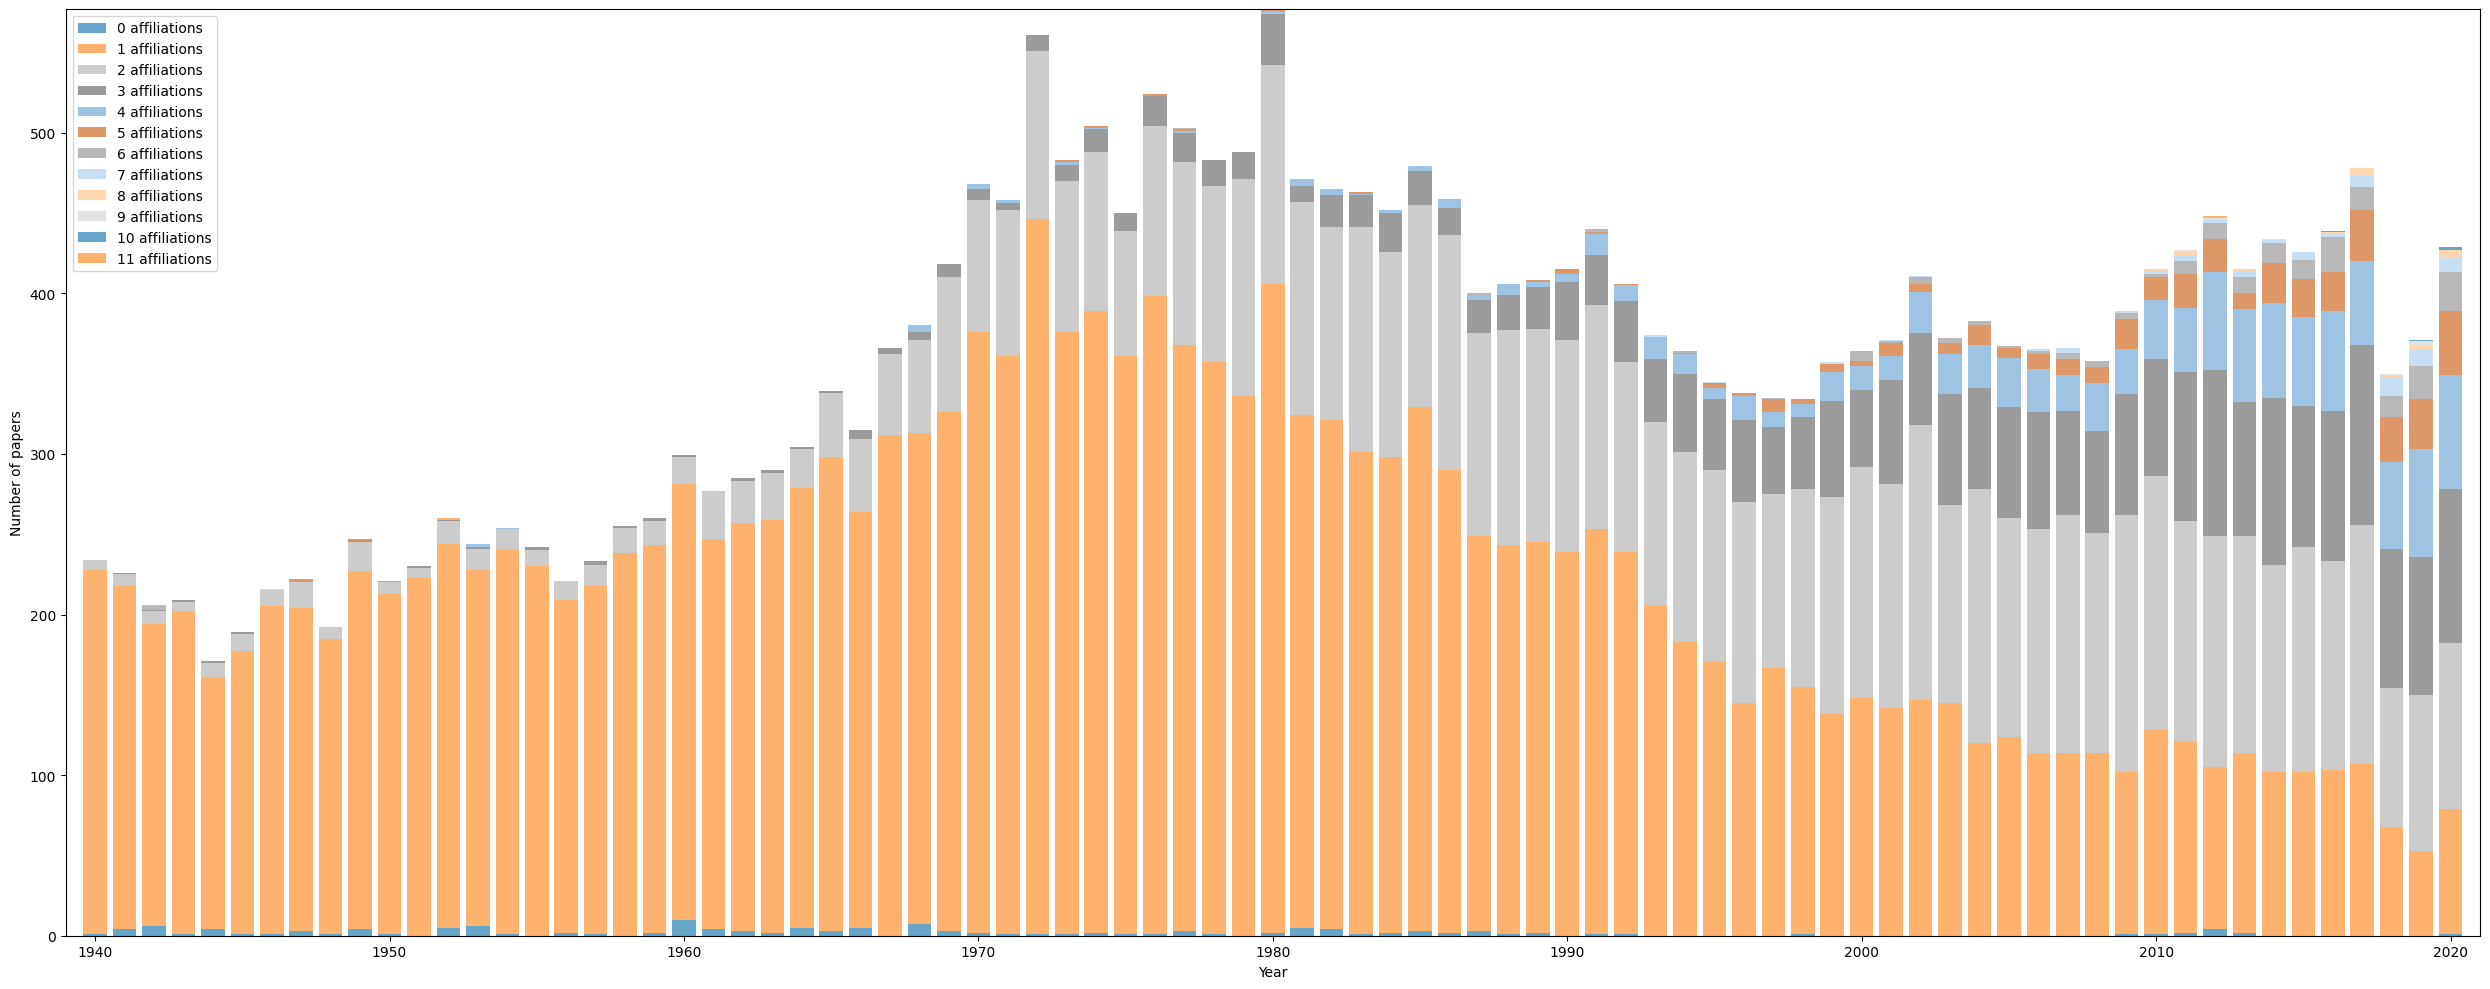

In [34]:
# number of affiliations (unweighted) per paper per year 
consol=pd.DataFrame(proc_auths.groupby(['url',"year"])['affs'].apply(lambda x: set().union(*x))).reset_index()
consol["aff_count"]=consol["affs"].apply(len)
consol.head()
grouped= consol.groupby(["year","aff_count"]).size().reset_index(name="count")
grouped['bucket'] = grouped['aff_count'].apply(lambda x: str(x))

grouped_chart_stacked(grouped, "affiliations","Number of papers",'average number of affiliations per paper per year (unweighted)', False, 'count')


In [220]:
consol["aff_count"].value_counts()

aff_count
1     18008
2      7050
3      2486
4      1024
5       397
6       188
0       138
7        70
8        18
9         7
10        4
11        3
Name: count, dtype: int64

In [47]:
# institutions featured per annum
inst_pa=df.groupby('year')['affs'].agg(lambda x: set([item for s in x for item in s])).reset_index(name="affils")
inst_pa["count"]=inst_pa["affils"].apply(len)

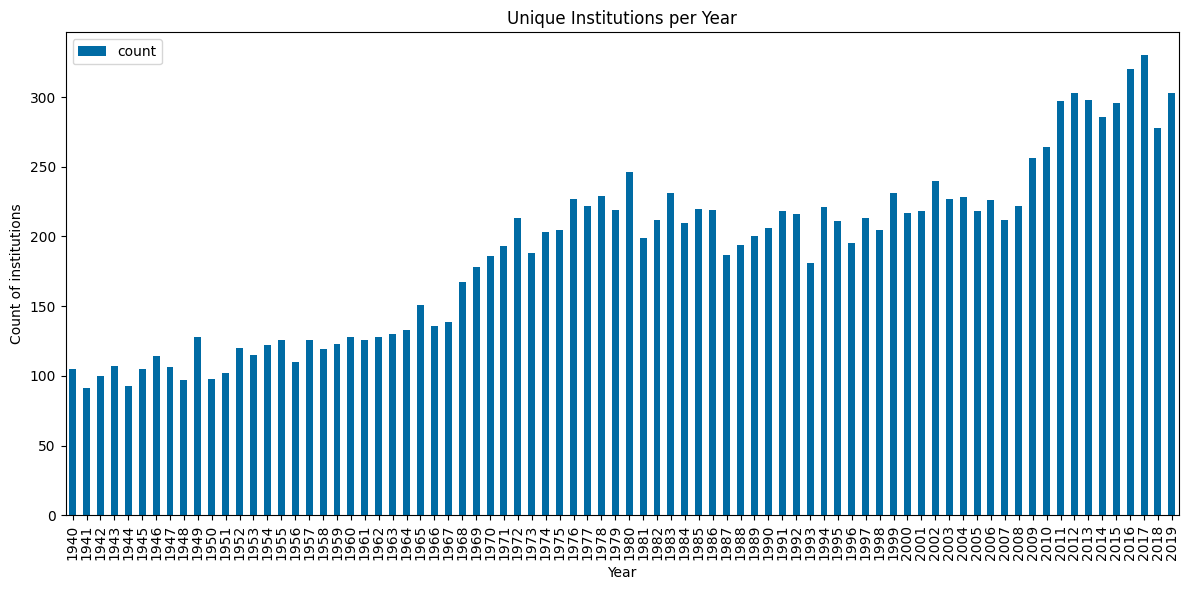

In [51]:
inst_pa.plot(x='year', y='count', kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count of institutions')
plt.title('Unique Institutions per Year')

plt.tight_layout()
plt.show()

In [35]:
affil_counts=pd.DataFrame(proc_auths['affs'].agg(lambda x: [item for s in x for item in s])).value_counts().reset_index(name="count").rename(columns={0: "aff"})


In [36]:
affil_counts["prop"]=affil_counts['count']*100/sum(affil_counts['count'])

In [38]:
affil_counts.head(20)

,aff,count,prop
0,national bureau of economic research - nber,3744,6.787404
1,harvard university,2575,4.668153
2,university of chicago,2056,3.727271
3,massachusetts institute of technology - mit,1820,3.299433
4,stanford university,1608,2.915103
5,london school of economics and political science,1365,2.474574
6,princeton university,1303,2.362176
7,university of california - berkeley,1236,2.240714
8,yale university,1216,2.204456
9,northwestern university,1128,2.044923


In [52]:
from collections import defaultdict

# Calculate affiliation shares
affiliation_scores = defaultdict(float)

for paper in proc_auths['url'].unique():
    paper_authors = proc_auths[proc_auths['url'] == paper]
    author_weight = 1.0 / len(paper_authors)  # Each author's share of the paper
    
    for _, row in paper_authors.iterrows():
        if len(row['affs']) > 0:
            affiliation_weight = author_weight / len(row['affs'])
            for affiliation in row['affs']:
                affiliation_scores[affiliation] += affiliation_weight
        else:
            affiliation_scores['Unknown'] += author_weight

# Convert to DataFrame for easier viewing
result_proc_auths = pd.DataFrame(list(affiliation_scores.items()), 
                        columns=['affiliation', 'score'])
result_proc_auths["prop"]=result_proc_auths["score"]*100/sum(result_proc_auths["score"])

In [53]:
result_proc_auths.sort_values("score",ascending=False).head(20)

,affiliation,score,prop
1,harvard university,1434.956041,4.881965
3,university of chicago,1180.248001,4.015405
11,massachusetts institute of technology - mit,990.528510,3.369947
0,national bureau of economic research - nber,918.522696,3.124971
5,stanford university,882.055593,3.000904
39,yale university,741.978148,2.524336
55,princeton university,737.432906,2.508873
77,university of california - berkeley,673.625992,2.291791
40,northwestern university,642.475000,2.185810
23,university of pennsylvania,599.856120,2.040813


In [54]:

df = proc_auths

# Calculate affiliation shares by decade
decade_affiliation_scores = defaultdict(lambda: defaultdict(float))

for decade in df['decade'].unique():
    decade_df = df[df['decade'] == decade]
    
    for paper in decade_df['url'].unique():
        paper_authors = decade_df[decade_df['url'] == paper]
        author_weight = 1.0 / len(paper_authors)  # Each author's share of the paper
        
        for _, row in paper_authors.iterrows():
            if len(row['affs']) > 0:  # Check if affiliations exist
                affiliation_weight = author_weight / len(row['affs'])
                for affiliation in row['affs']:
                    decade_affiliation_scores[decade][affiliation] += affiliation_weight

# Convert to DataFrame for easier viewing
results = []
for decade, affiliations in decade_affiliation_scores.items():
    for affiliation, score in affiliations.items():
        results.append({'decade': decade, 'affiliation': affiliation, 'score': score})

result_df = pd.DataFrame(results)

In [63]:
# Rank affiliations within each decade (1 = highest score, ties get minimum rank)
result_df['rank'] = result_df.groupby('decade')['score'].rank(ascending=False, method='min')

# Convert to integer for cleaner display
result_df['rank'] = result_df['rank'].astype(int)

# Create top 10 indicator if needed
result_df['is_top_10'] = (result_df['rank'] <= 10).astype(int)

In [64]:
decade_totals = result_df.groupby('decade')['score'].sum()
decade_totals_df = result_df.groupby('decade')['score'].sum().reset_index()
decade_totals_df.columns = ['decade', 'total_score']

In [68]:
decade_top_20s = {}
compiled_20 = set()
for i in result_df['decade'].unique():
    if i==2020:
        continue
    t_res=result_df[result_df['decade']==i].groupby('affiliation')['score'].sum().nlargest(20).index
    decade_top_20s[i]=list(t_res)
    compiled_20=compiled_20 | set(t_res)

decade_top_10s = {}
compiled_10 = set()
for i in result_df['decade'].unique():
    if i==2020:
        continue
    t_res=result_df[result_df['decade']==i].groupby('affiliation')['score'].sum().nlargest(10).index
    decade_top_10s[i]=list(t_res)
    compiled_10=compiled_10 | set(t_res)

decade_top_15s = {}
compiled_15 = set()
for i in result_df['decade'].unique():
    if i==2020:
        continue
    t_res=result_df[result_df['decade']==i].groupby('affiliation')['score'].sum().nlargest(15).index
    decade_top_15s[i]=list(t_res)
    compiled_15=compiled_15 | set(t_res)

In [97]:
result_df["affiliation"].unique().shape

(2516,)

In [69]:
result_df.head()

,decade,affiliation,score,rank,is_top_10
0,2020,national bureau of economic research - nber,44.332778,1,1
1,2020,harvard university,17.676389,4,1
2,2020,university of michigan,4.600000,17,0
3,2020,university of chicago,13.731944,7,1
4,2020,facebook,0.333333,178,0


In [84]:
rank_pivot.head()

affiliation,carnegie mellon university,columbia university,harvard university,hebrew university of jerusalem,iowa state university,london school of economics and political science,massachusetts institute of technology - mit,national bureau of economic research - nber,new york city united states (city),new york university,...,princeton university,stanford university,university of california,university of california - berkeley,university of chicago,university of michigan,university of oxford,university of pennsylvania,washington dc (city),yale university
decade,,,,,,,,,,,,,,,,,,,,,
1940,0.0,1.0,1.0,NaN,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1950,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1960,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1970,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1980,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0


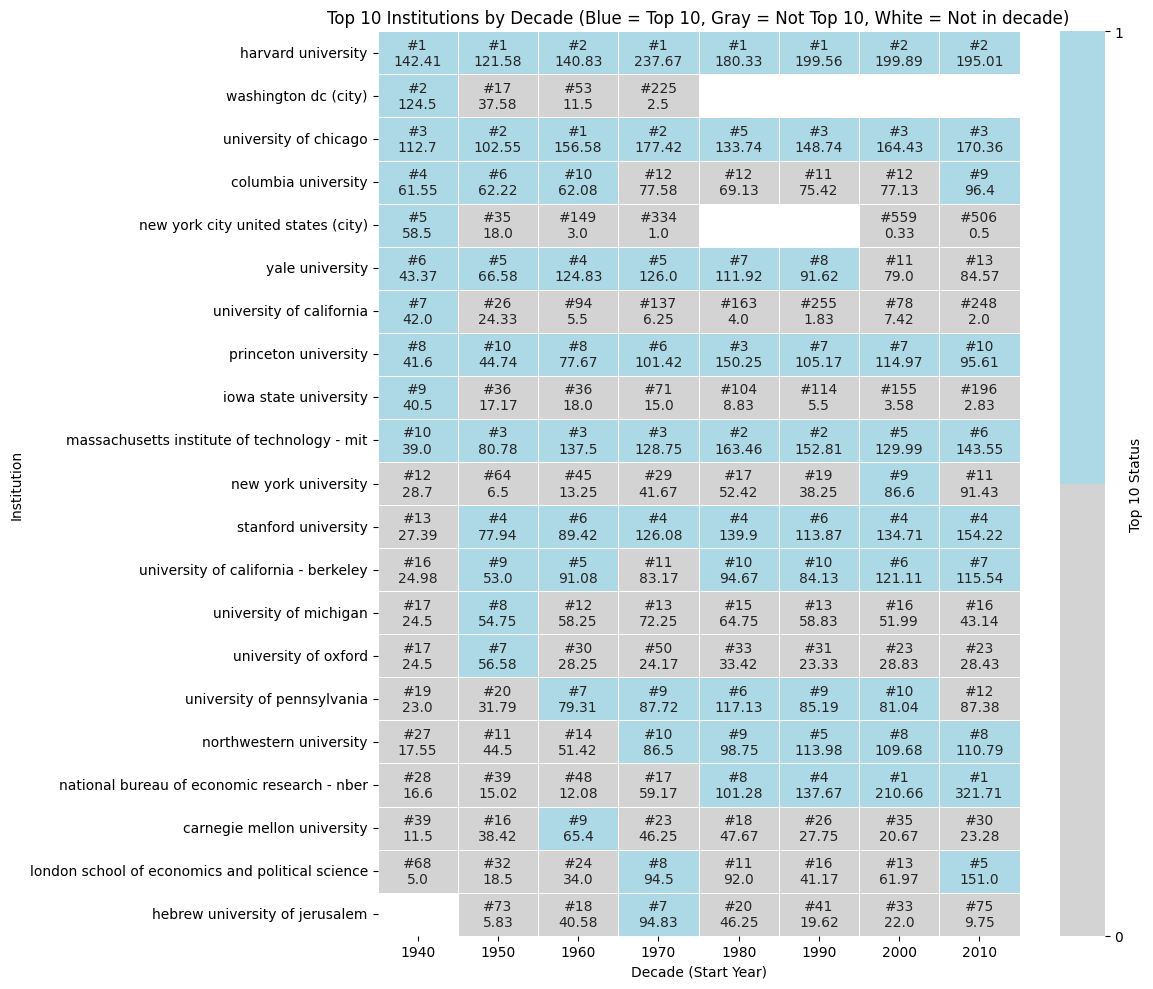

In [99]:
# Create pivot table showing ranks (will have NaN for non-top-10)

rank_pivot = filtered_affs_10.pivot(index='decade', columns='affiliation', values='is_top_10')
scores_pivot = filtered_affs_10.pivot(index='decade', columns='affiliation', values='score').fillna(0)
ranks_pivot = filtered_affs_10.pivot(index='decade', columns='affiliation', values='rank').fillna('-1')

# column_order = scores_pivot.sum(axis=0).sort_values(ascending=False).index
first_decade = rank_pivot.index.min()
first_decade_scores = scores_pivot.loc[first_decade].sort_values(ascending=False)
column_order = first_decade_scores.index


rank_pivot = rank_pivot.reindex(column_order, axis=1)
scores_pivot = scores_pivot.reindex(column_order, axis=1)
ranks_pivot = ranks_pivot.reindex(column_order, axis=1)

rank_for_color = ranks_pivot.fillna(11)  # 11 for not top 10
rank_for_color[rank_pivot.fillna(0) == 0] = 11  # Ensure not top 10 = 11

# Create colormap: ranks 1-10 get green gradient, 11 gets gray
colors = plt.cm.Greens_r(np.linspace(0.2, 0.8, 10)).tolist() + ['lightgray']
custom_cmap = mcolors.ListedColormap(colors)

# Create combined annotation: rank on top, score on bottom
combined_annot = "#"+ranks_pivot.astype(int).astype(str) + '\n' + scores_pivot.round(2).astype(str)
# Replace 'nan' with empty string for cleaner display
combined_annot = combined_annot.replace('#-1\n0.0', 'NA').replace('nan', 'NA')

plt.figure(figsize=(12, 10))
sns.heatmap(rank_pivot.T, 
            annot=combined_annot.T,  # Show actual scores as annotations
            fmt='', 
            cmap=['lightgray', 'lightblue'],  # Two colors: not top 10, top 10
            cbar_kws={'ticks': [0, 1], 'label': 'Top 10 Status'},
            # cmap=custom_cmap,
            # vmin=1, vmax=11,
            # cbar_kws={'ticks': list(range(1, 12)), 
                    #  'label': 'Rank (11 = Not Top 10)'},
                    annot_kws={'size': 10},
            linewidths=0.5)

plt.xlabel('Decade (Start Year)')
plt.ylabel('Institution')
plt.title('Top 10 Institutions by Decade (Blue = Top 10, Gray = Not Top 10, White = Not in decade)')
plt.tight_layout()
plt.show()

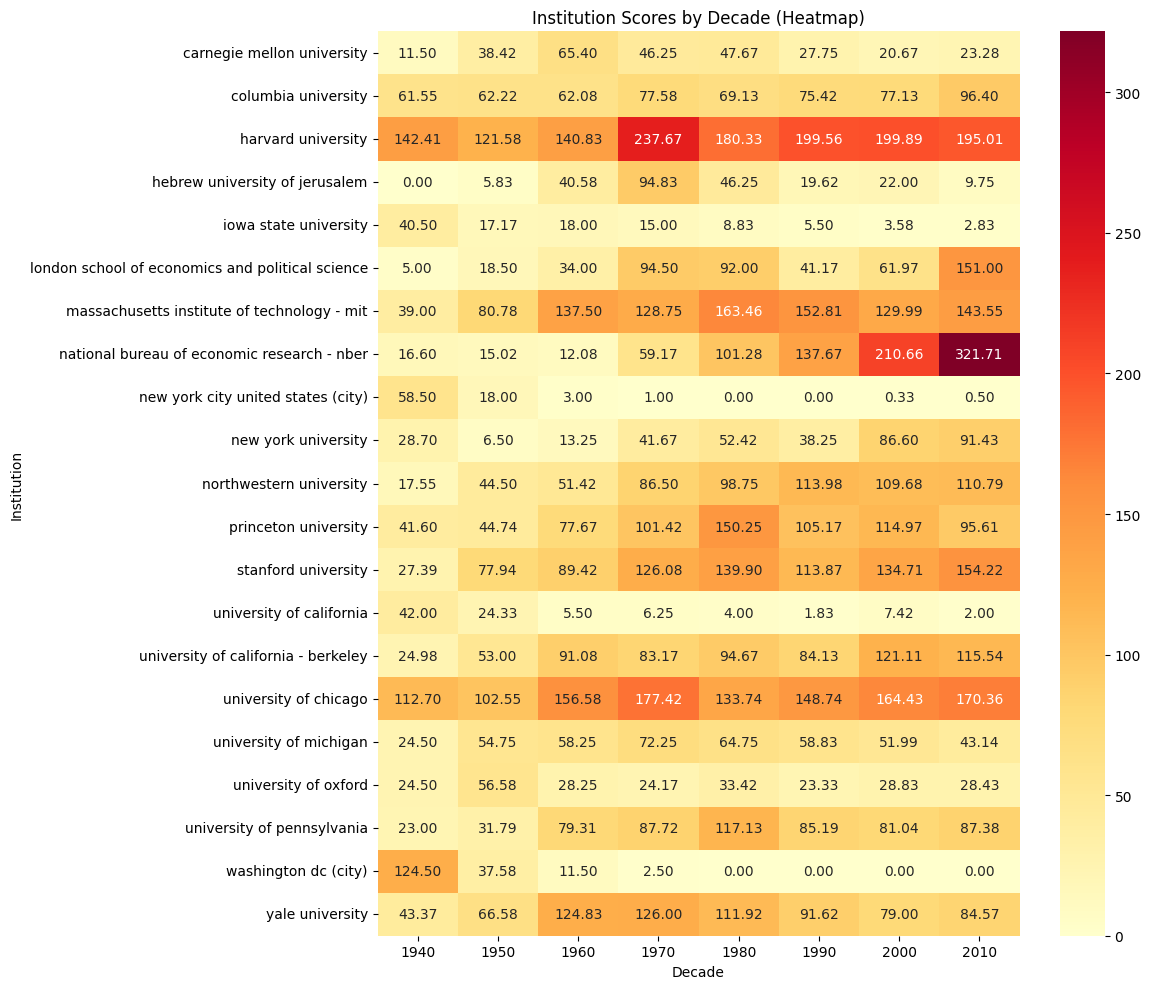

In [88]:
import matplotlib.colors as mcolors

import seaborn as sns

filtered_affs_10=result_df[result_df['affiliation'].isin(compiled_10) &(result_df["decade"]<=2010)]
filtered_pivot_df = filtered_affs_10.pivot(index='decade', columns='affiliation', values='score').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_pivot_df.T, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Decade')
plt.ylabel('Institution')
plt.title('Institution Scores by Decade (Heatmap)')
plt.tight_layout()
plt.show()

In [322]:
# Get top 20 institutions by total score across all decades
top_20_institutions = result_df.groupby('affiliation')['score'].sum().nlargest(20).index

# Filter the result_df to only include top 20 institutions
filtered_df = result_df[result_df['affiliation'].isin(top_20_institutions)]

print("Top 15 institutions:")
print(result_df.groupby('affiliation')['score'].sum().nlargest(20))

Top 15 institutions:
affiliation
harvard university                                  1434.956041
university of chicago                               1180.248001
massachusetts institute of technology - mit          990.528510
national bureau of economic research - nber          918.522696
stanford university                                  882.055593
yale university                                      741.978148
princeton university                                 737.432906
university of california - berkeley                  673.625992
northwestern university                              642.475000
university of pennsylvania                           599.856120
columbia university                                  589.302366
london school of economics and political science     524.440992
university of michigan                               433.067857
university of california - los angeles               425.235714
new york university                                  364.839286
carnegi

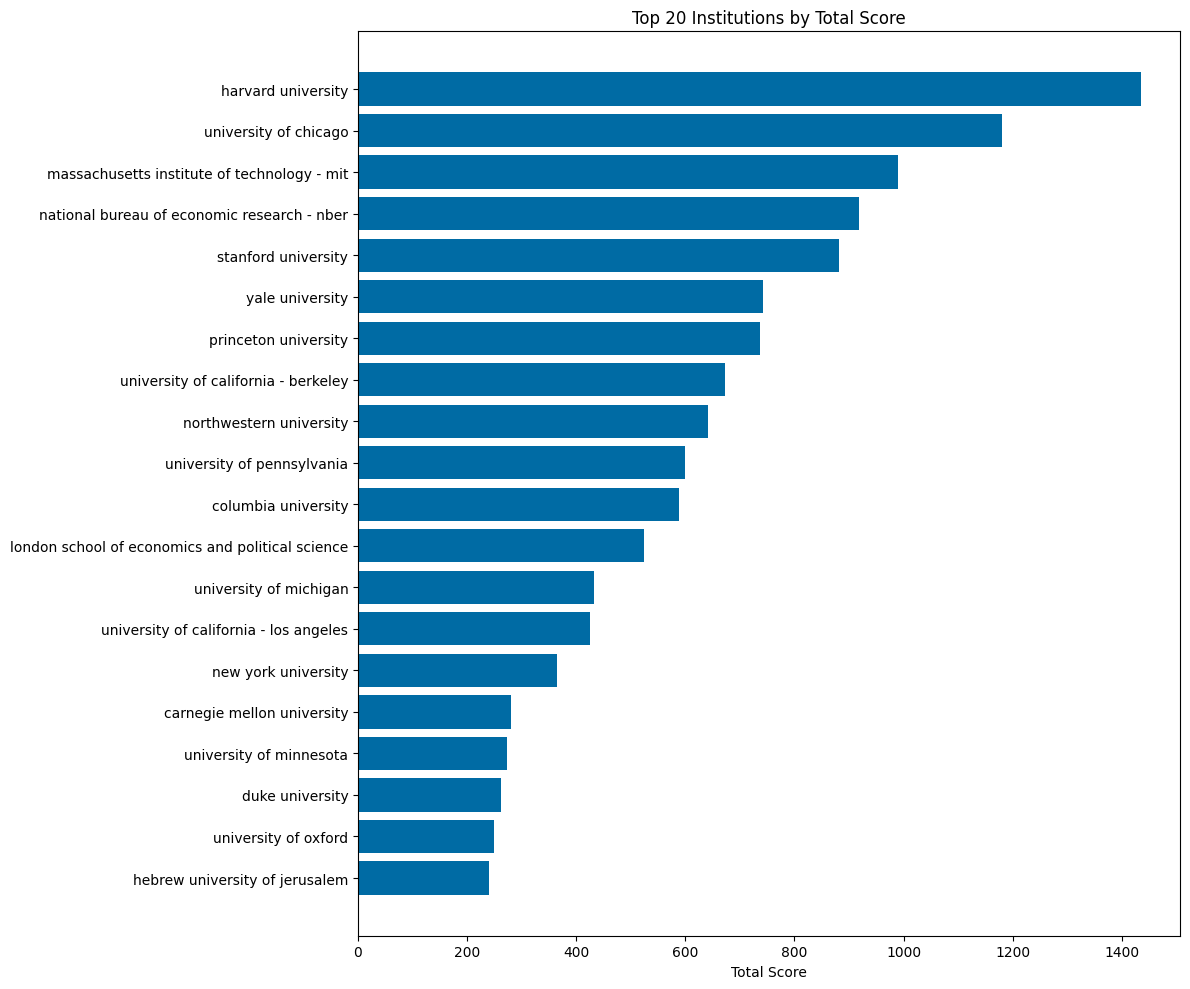

In [292]:
import matplotlib.pyplot as plt

top_20_scores = result_df.groupby('affiliation')['score'].sum().nlargest(20)

plt.figure(figsize=(12, 10))
plt.barh(range(len(top_20_scores)), top_20_scores.values)
plt.yticks(range(len(top_20_scores)), top_20_scores.index)
plt.xlabel('Total Score')
plt.title('Top 20 Institutions by Total Score')
plt.gca().invert_yaxis()  # Highest score at top
plt.tight_layout()
plt.show()

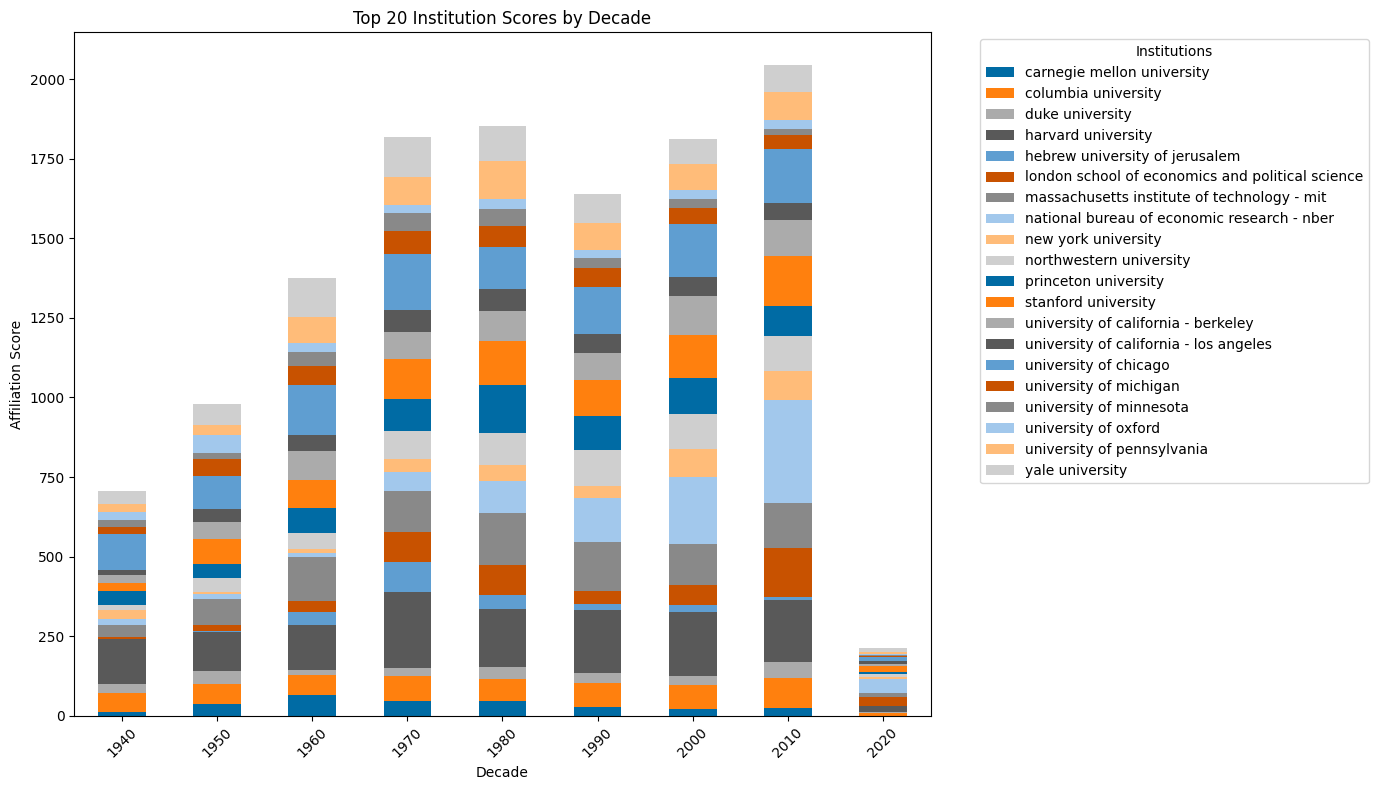

In [293]:
# Filter and create stacked chart
top_20_institutions = result_df.groupby('affiliation')['score'].sum().nlargest(20).index
filtered_df = result_df[result_df['affiliation'].isin(top_20_institutions)]
filtered_pivot_df = filtered_df.pivot(index='decade', columns='affiliation', values='score').fillna(0)

plt.figure(figsize=(14, 8))
ax = filtered_pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Decade')
plt.ylabel('Affiliation Score')
plt.title('Top 20 Institution Scores by Decade')
plt.legend(title='Institutions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

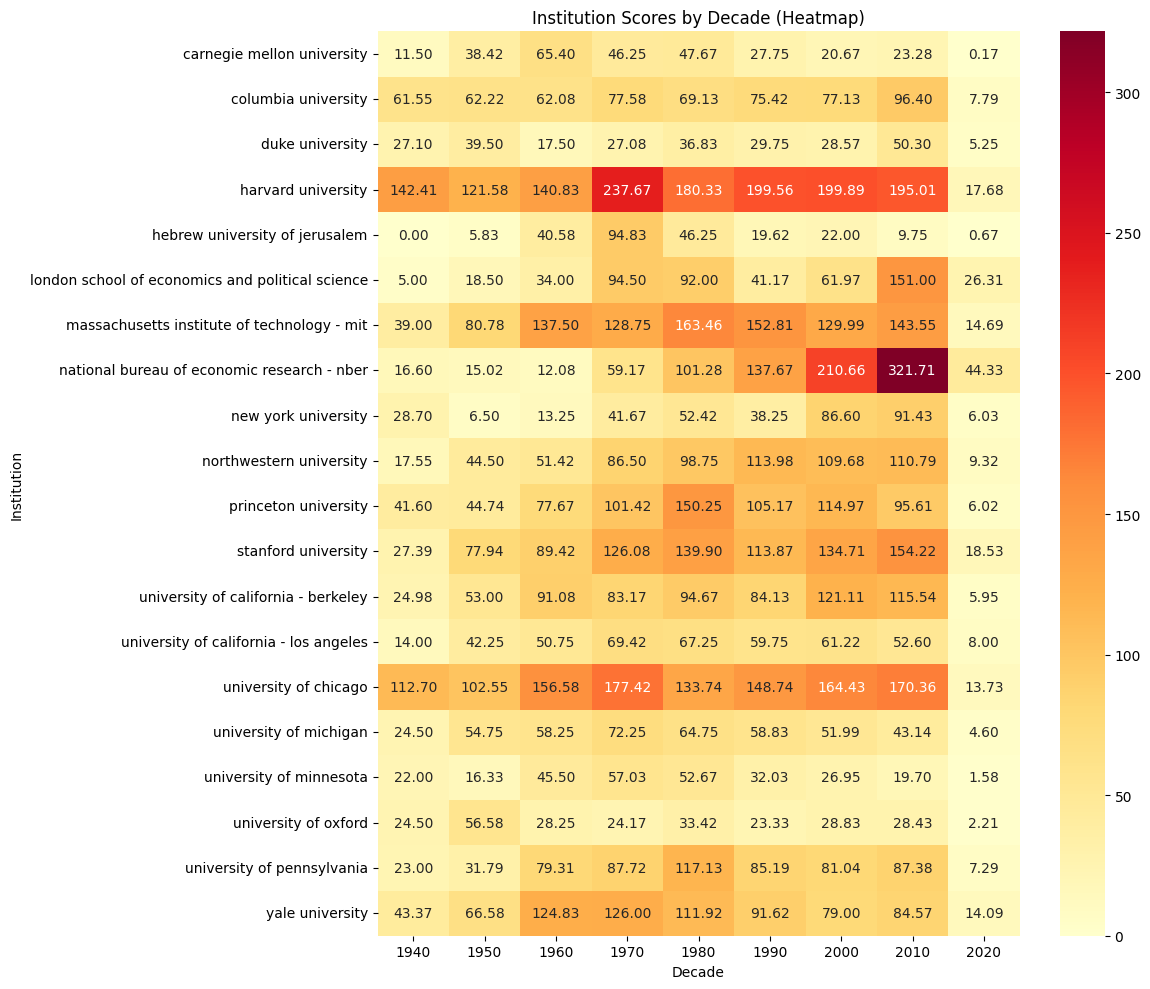

In [295]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_pivot_df.T, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Decade')
plt.ylabel('Institution')
plt.title('Institution Scores by Decade (Heatmap)')
plt.tight_layout()
plt.show()